In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
from PFClasses import SimpleModel, ParticleFilter, Kalman, Event, StochasticModelTauLeaping
plt.rcParams['figure.figsize'] = (17, 7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def avg(xs):
    if len(xs) == sum(xs == -np.inf):
        return -np.inf
    return np.average(xs[xs != -np.inf])

In [5]:
def PF_likelihood(testcase):
    model, measurements, N = testcase
    return ParticleFilter(model, N=N, measurements=measurements, prior_cov_matrix=model.Q).run()[2]

In [6]:
def KF_likelihood(testcase):
    model, measurements = testcase
    return Kalman(model, measurements).run()[2]

In [7]:
def test_likelihoods_pf_kf_simple_q():
    x_0 = np.array([0.])
    F = np.array([[1.]])
    H = np.array([[1.]])
    Q = np.array([[1.]])
    R = np.array([[1.]])
    
    iterations = 5
    time = 50
    N = 100
    
    real_model = SimpleModel(x_0, F, H, Q, R)
    measurements = [real_model.measure(t) for t in range(time)]    
    
    Q_values_to_test = [np.array([[10. ** i]]) for i in range(-10, 10)]
    models_to_test = [SimpleModel(x_0, F, H, Q_, R) for Q_ in Q_values_to_test]
    
    PF_tests = [(model, measurements, N) for model in models_to_test]
    KF_tests = [(model, measurements) for model in models_to_test]
    
    pf_likelihoods_tests = []
    kf_likelihoods_tests = []
    for _ in range(iterations):
        with Pool(10) as p:
            pf_likelihoods_tests.append(np.array(p.map(PF_likelihood, PF_tests)))
            kf_likelihoods_tests.append(np.array(p.map(KF_likelihood, KF_tests)))
    
    pf_likelihoods = np.array(list(map(avg, np.array(pf_likelihoods_tests).T)))
    kf_likelihoods = np.array(list(map(avg, np.array(kf_likelihoods_tests).T)))
    
    xs = list(map(lambda x: x[0][0], Q_values_to_test))
    plt.plot(xs, pf_likelihoods, label='PF likelihoods')
    plt.plot(xs, kf_likelihoods, label='KF likelihoods')
    plt.axvline(x=Q[0][0], color='k', label='real value')
    plt.ylabel("Loglikelihood")
    plt.xlabel("Q values")
    plt.xscale("log")
    plt.legend()
    plt.show()
    return pf_likelihoods, kf_likelihoods

In [8]:
def test_likelihoods_pf_kf_simple_r():
    x_0 = np.array([0.])
    F = np.array([[1.]])
    H = np.array([[1.]])
    Q = np.array([[1.]])
    R = np.array([[1.]])
    
    iterations = 5
    time = 50
    N = 100
    
    real_model = SimpleModel(x_0, F, H, Q, R)
    measurements = [real_model.measure(t) for t in range(time)]    
    
    R_values_to_test = [np.array([[i]]) for i in np.linspace(.0001, 3, 30)]
    models_to_test = [SimpleModel(x_0, F, H, Q, R_) for R_ in R_values_to_test]
    
    PF_tests = [(model, measurements, N) for model in models_to_test]
    KF_tests = [(model, measurements) for model in models_to_test]
    
    pf_likelihoods_tests = []
    kf_likelihoods_tests = []
    for _ in range(iterations):
        with Pool(10) as p:
            pf_likelihoods_tests.append(np.array(p.map(PF_likelihood, PF_tests)))
            kf_likelihoods_tests.append(np.array(p.map(KF_likelihood, KF_tests)))
    
    pf_likelihoods = np.array(list(map(avg, np.array(pf_likelihoods_tests).T)))
    kf_likelihoods = np.array(list(map(avg, np.array(kf_likelihoods_tests).T)))
    
    xs = list(map(lambda x: x[0][0], R_values_to_test))
    plt.plot(xs, pf_likelihoods, label='PF likelihoods')
    plt.plot(xs, kf_likelihoods, label='KF likelihoods')
    plt.axvline(x=Q[0][0], color='k', label='real value')
    plt.ylabel("Loglikelihood")
    plt.xlabel("R values")
#     plt.xscale("log")
    plt.legend()
    plt.show()
    return pf_likelihoods, kf_likelihoods

In [9]:
def test_likelihoods_pf_kf_simple_f():
    x_0 = np.array([0.])
    F = np.array([[1.]])
    H = np.array([[1.]])
    Q = np.array([[1.]])
    R = np.array([[1.]])
    
    iterations = 5
    time = 50
    N = 100
    
    real_model = SimpleModel(x_0, F, H, Q, R)
    measurements = [real_model.measure(t) for t in range(time)]    
    
    F_values_to_test = [np.array([[i]]) for i in np.linspace(-2, 2, 20)]
    models_to_test = [SimpleModel(x_0, F_, H, Q, R) for F_ in F_values_to_test]
    
    PF_tests = [(model, measurements, N) for model in models_to_test]
    KF_tests = [(model, measurements) for model in models_to_test]
    
    pf_likelihoods_tests = []
    kf_likelihoods_tests = []
    for _ in range(iterations):
        with Pool(10) as p:
            pf_likelihoods_tests.append(np.array(p.map(PF_likelihood, PF_tests)))
            kf_likelihoods_tests.append(np.array(p.map(KF_likelihood, KF_tests)))
    
    pf_likelihoods = np.array(list(map(avg, np.array(pf_likelihoods_tests).T)))
    kf_likelihoods = np.array(list(map(avg, np.array(kf_likelihoods_tests).T)))
    
    xs = list(map(lambda x: x[0][0], F_values_to_test))
    plt.plot(xs, pf_likelihoods, label='PF likelihoods')
    plt.plot(xs, kf_likelihoods, label='KF likelihoods')
    plt.axvline(x=Q[0][0], color='k', label='real value')
    plt.ylabel("Loglikelihood")
    plt.xlabel("F values")
    plt.xscale("log")
    plt.legend()
    plt.show()
    return pf_likelihoods, kf_likelihoods

In [10]:
def test_likelihoods_pf_kf_simple_h():
    x_0 = np.array([0.])
    F = np.array([[1.]])
    H = np.array([[1.]])
    Q = np.array([[1.]])
    R = np.array([[1.]])
    
    iterations = 5
    time = 50
    N = 500
    
    real_model = SimpleModel(x_0, F, H, Q, R)
    measurements = [real_model.measure(t) for t in range(time)]    
    
    H_values_to_test = [np.array([[i]]) for i in np.linspace(-2, 5, 20)]
    models_to_test = [SimpleModel(x_0, F, H_, Q, R) for H_ in H_values_to_test]
    
    PF_tests = [(model, measurements, N) for model in models_to_test]
    KF_tests = [(model, measurements) for model in models_to_test]
    
    pf_likelihoods_tests = []
    kf_likelihoods_tests = []
    for _ in range(iterations):
        with Pool(10) as p:
            pf_likelihoods_tests.append(np.array(p.map(PF_likelihood, PF_tests)))
            kf_likelihoods_tests.append(np.array(p.map(KF_likelihood, KF_tests)))
    
    pf_likelihoods = np.array(list(map(avg, np.array(pf_likelihoods_tests).T)))
    kf_likelihoods = np.array(list(map(avg, np.array(kf_likelihoods_tests).T)))
    
    xs = list(map(lambda x: x[0][0], H_values_to_test))
    plt.plot(xs, pf_likelihoods, label='PF likelihoods')
    plt.plot(xs, kf_likelihoods, label='KF likelihoods')
    plt.axvline(x=H[0][0], color='k', label='real value')
    plt.ylabel("Loglikelihood")
    plt.xlabel("H values")
    plt.xscale("log")
    plt.legend()
    plt.show()
    return pf_likelihoods, kf_likelihoods

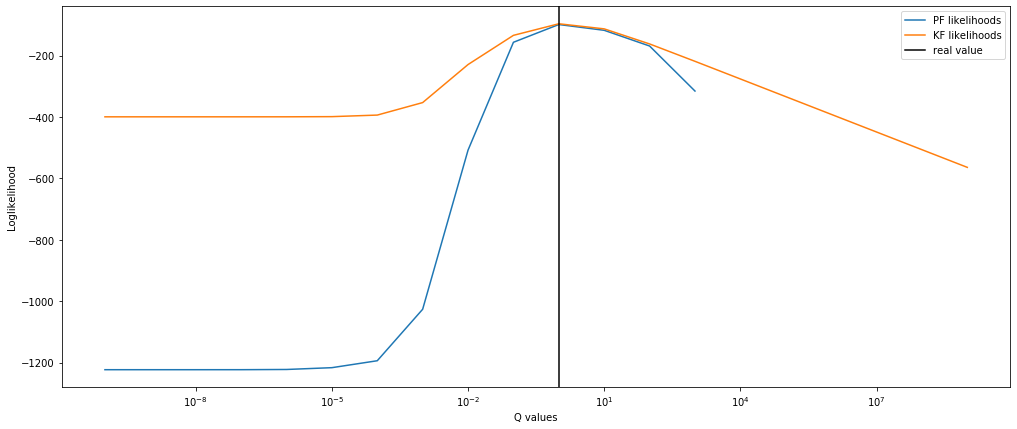

In [18]:
pfs1, kfs1 = test_likelihoods_pf_kf_simple_q()

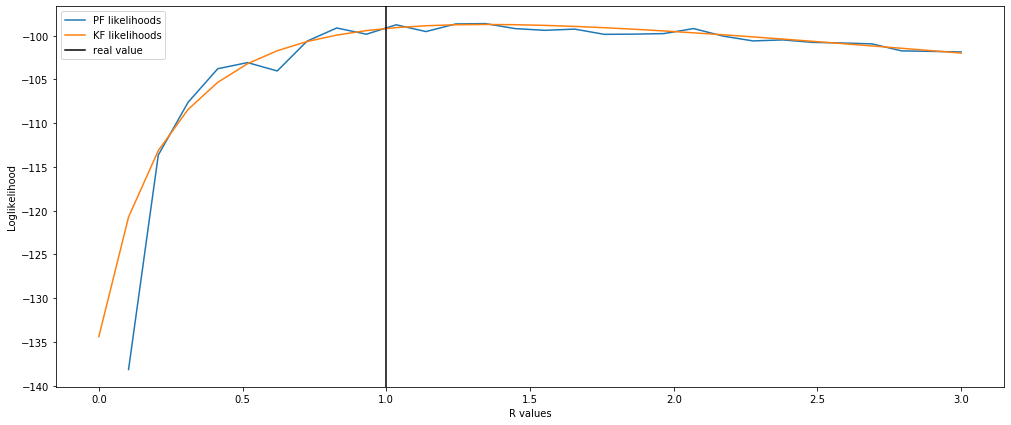

In [11]:
pfs2, kfs2 = test_likelihoods_pf_kf_simple_r()

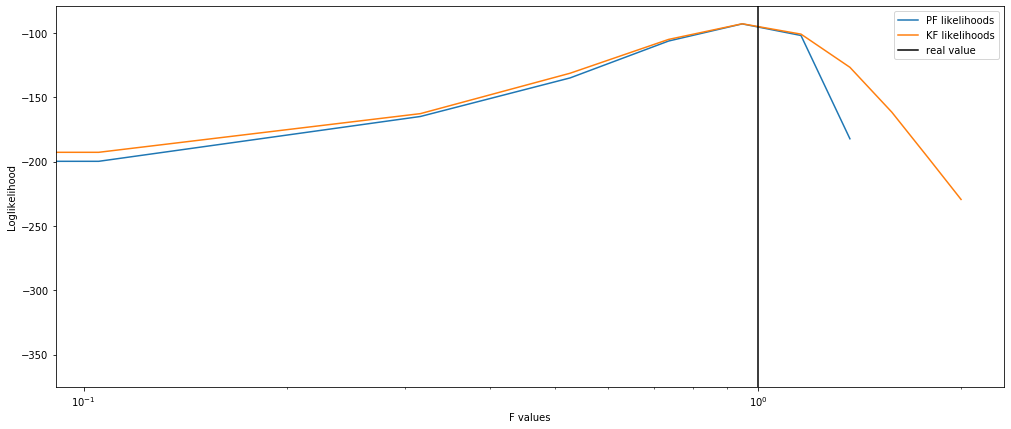

In [33]:
pfs3, kfs3 = test_likelihoods_pf_kf_simple_f()

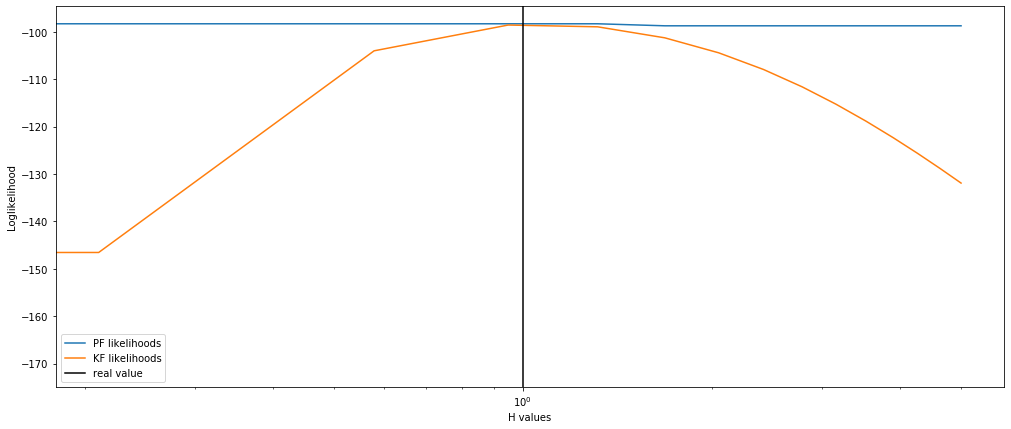

In [44]:
pfs4, kfs4 = test_likelihoods_pf_kf_simple_h()

# Simple 1D example

In [10]:
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10

model1 = SimpleModel(x_0, F, H, Q, R)
time = 50

In [11]:
pf1 = ParticleFilter(model1, N=1000, resampling_algo='simple_resample', 
                     x_0=model1.states[0], prior_cov_matrix=model1.Q,
                    measurement_err_cov_matrix=model1.R)

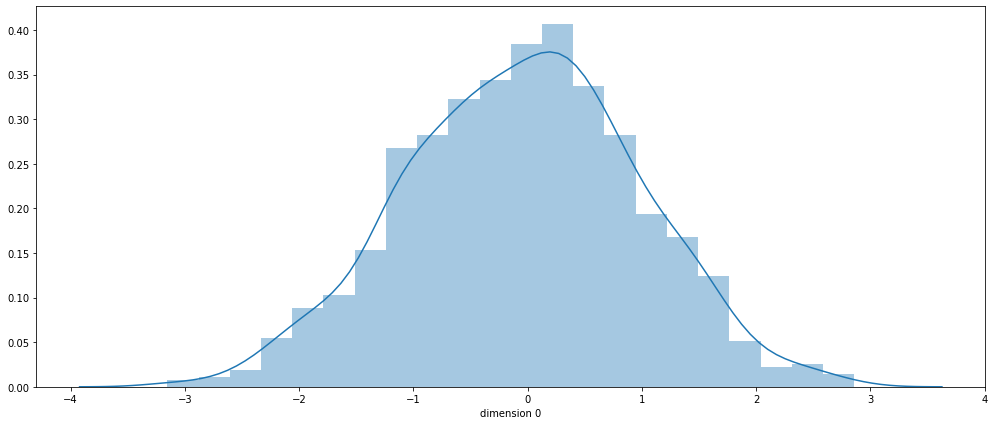

In [12]:
pf1.plot_particles()

Running PF with 1000 particles: .....R.....R.......R....R......R.......R...R..... end
Marginal likelihood:  -139.2985


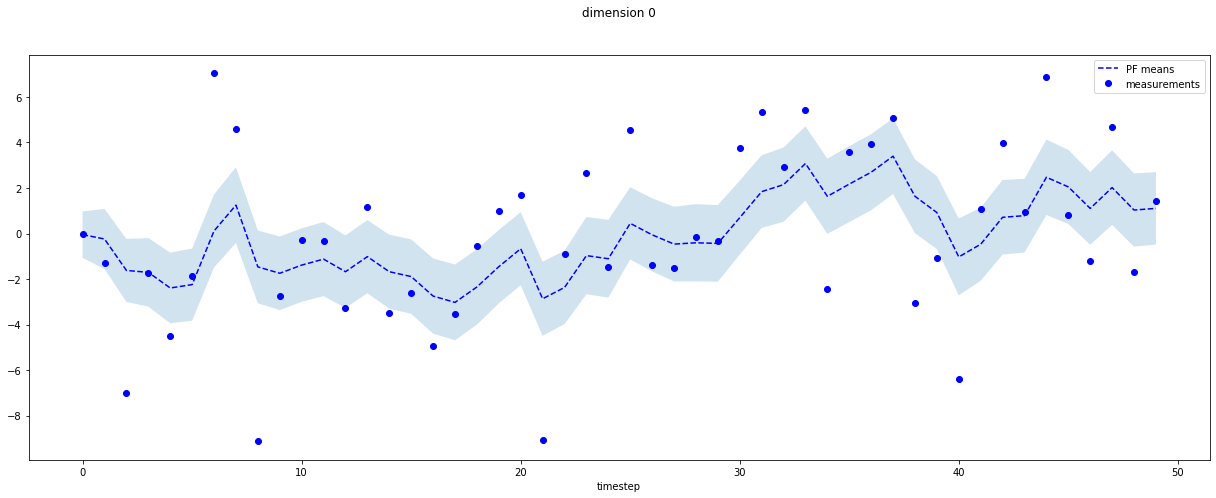

In [13]:
pf_means, pf_variances, pf_likelihood = pf1.run(time)

Loglikelihood:  -187.1331545670288


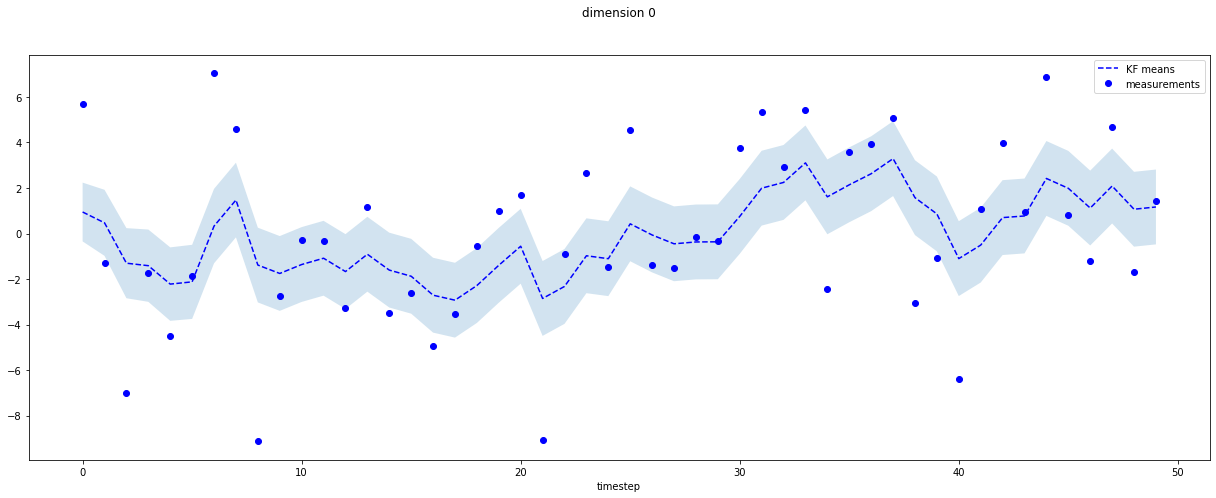

KF ran successfully


In [17]:
kf1 = Kalman(model1, print_results=True, measurement_err_cov_matrix=model1.R)
kf_means, kf_variances, kf_loglikelihood = kf1.run(time)

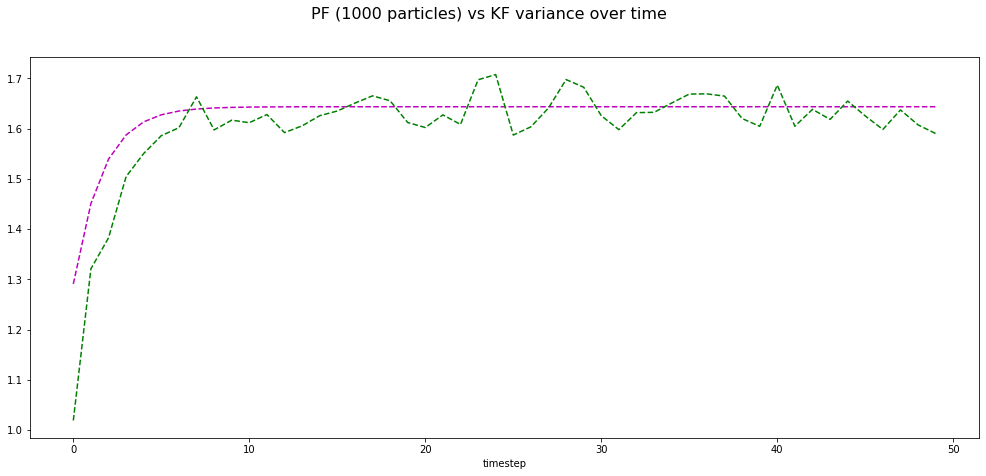

In [18]:
times = range(time)
fig = plt.figure()
fig.suptitle('PF (1000 particles) vs KF variance over time', fontsize=16)
ax = fig.add_subplot(111)
ax.plot(times, kf_variances, 'm--', label='KF variances')
ax.plot(times, pf_variances, 'g--', label='PF variances')
ax.set_xlabel("timestep")
plt.show()

In [19]:
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000]#, 1100, 2000, 2200]
time = 50

def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo='simple_resample', x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)

.....R...R..........R...R.......R......R...R..... end
.....R............R.....R.......R.....R........R. end
.....R........R.........R......R.......R...R..... end
.....R......R.........R......R.......R.....R..... end
.....R..R..........R......R....R......R.......R.. end
.....R.....R.......R....R......R......R....R..... end
.....R.....R.......R....R......R.......R...R..... end
.....R.......R......R...R......R......R....R..... end
...R.R......R.......R...R......R......R....R..... end
...R.R.....R.......R....R......R......R....R..... end
...R.R.....R........R...R......R.......R...R..... end
...R.R.....R.......RR...R......R.......R...R..... end


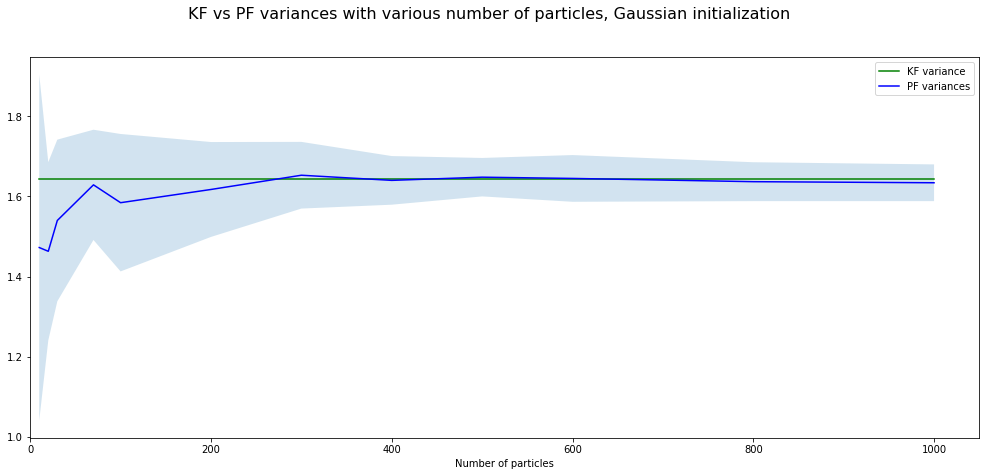

In [20]:
kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_variances[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

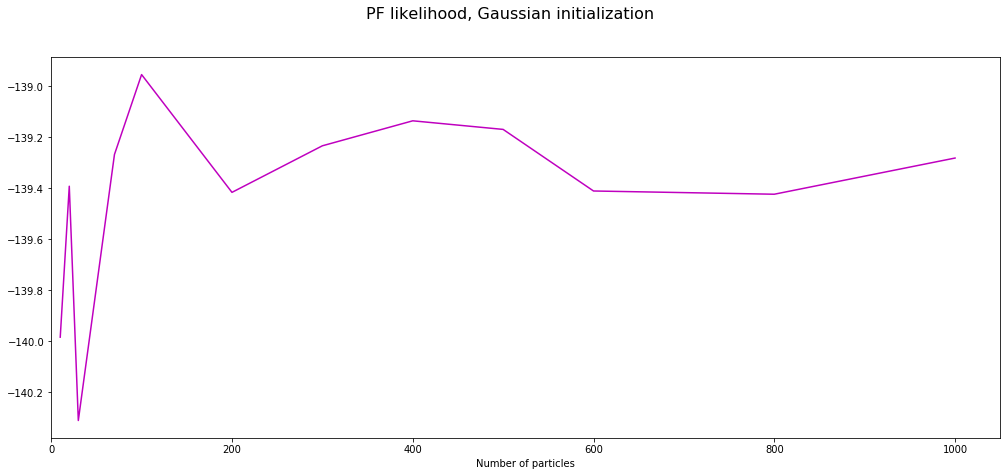

In [21]:
times = range(len(particles_to_test))
pf_likelihoods = res[:, 3]
fig = plt.figure()
fig.suptitle("PF likelihood, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)
ax.plot(particles_to_test, pf_likelihoods, 'm')
ax.set_xlabel("Number of particles")
ax.set_xlim(left=0)
plt.show()

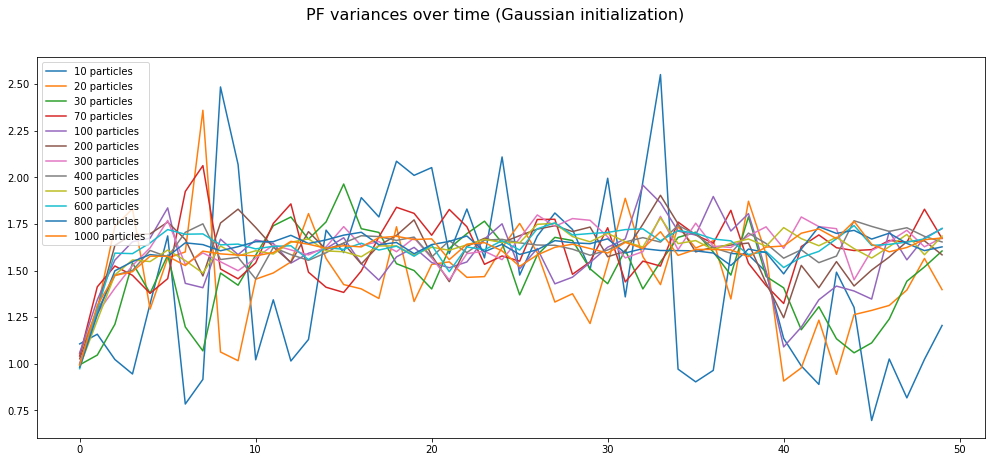

In [22]:
variances = res[:, 0]
times = range(time)
fig = plt.figure()
fig.suptitle("PF variances over time (Gaussian initialization)", fontsize=16)
ax = fig.add_subplot(111)
for nr in range(len(particles_to_test)):
    ax.plot(times, variances[nr], label=str(particles_to_test[nr])+" particles")
ax.legend()
plt.show()

In [23]:
particles_to_test = [10, 15, 20, 25, 30, 35, 45, 50, 70, 100, 200, 300, 400, 500]#, 600, 800, 1000]#, 1100, 2000, 2200]
time = 50

from multiprocessing import Pool
def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo='simple_resample', ranges=[[-100, 100]], 
                        print_results=False, measurement_err_cov_matrix=model1.R)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.var(pf_variances[int(.2 * time):])

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)

RRRRRRRR.RR.RRR.R..R.RR.R.R...R.R...R..........R. end
R.....RR...........R.........R.......R........... end
R...........R.........R........R.......R...R..... end
R....R......R.........R........R.......R...R..... end
R....R......R...........R.......R......R...R..... end
R....R....R.....R......R........R.....R.....R.... end
R....R.....R..........R.......R........R...R..... end
R.....RR.........R......R.....R.......R....R..... end
RR...R.....R.......RR..R......R.......R....R..... end
RR....RR..........R.....R......R.......R...R..... end
R....R........R.......R.......R.......R....R..... end
R....R......R......R....R......R.......R...R..... end
RR...R......R......RR...R......R.......R...R..... end
R....R.....R.......RR...R......R.......R...R..... end


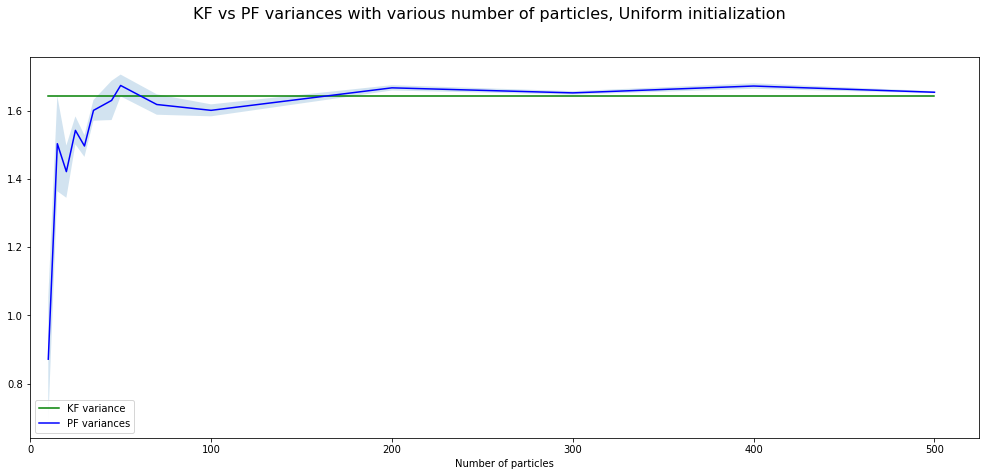

In [24]:
kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_variances[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Uniform initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

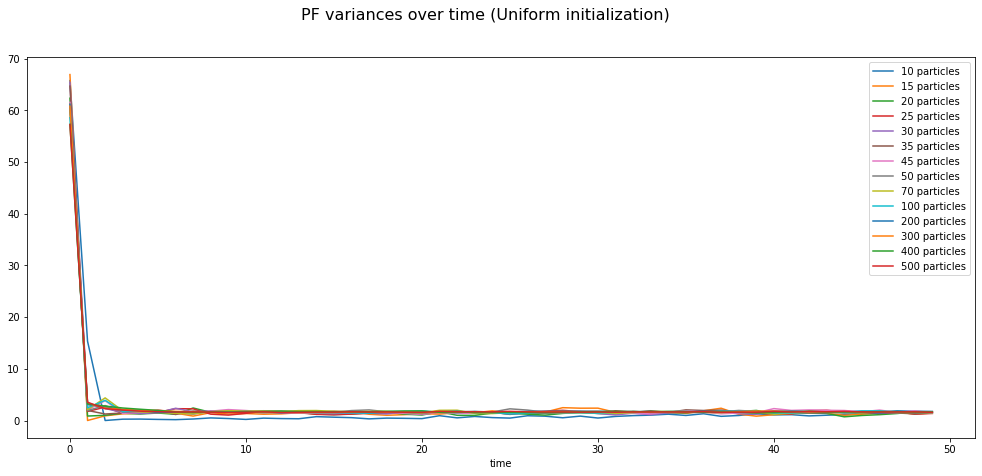

In [25]:
variances = res[:, 0]
times = range(time)
fig = plt.figure()
fig.suptitle("PF variances over time (Uniform initialization)", fontsize=16)
ax = fig.add_subplot(111)
for nr in range(len(particles_to_test)):
    ax.plot(times, variances[nr], label=str(particles_to_test[nr])+" particles")
ax.legend()
ax.set_xlabel("time")
plt.show()

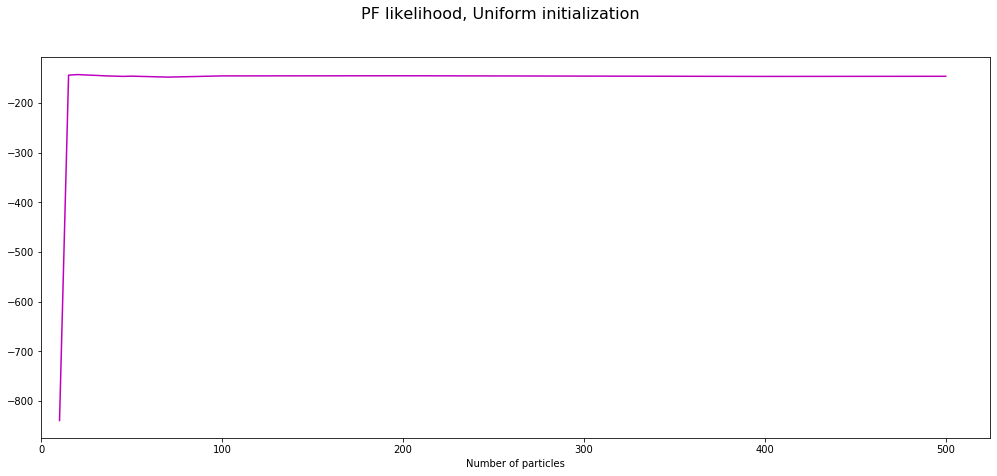

In [26]:
times = range(len(particles_to_test))
pf_likelihoods = res[:, 3]
fig = plt.figure()
fig.suptitle("PF likelihood, Uniform initialization", fontsize=16)
ax = fig.add_subplot(111)
ax.plot(particles_to_test, pf_likelihoods, 'm')
ax.set_xlabel("Number of particles")
ax.set_xlim(left=0)
plt.show()

# Measurement error cov matrix vs likelihood

# Testing different resampling strategies

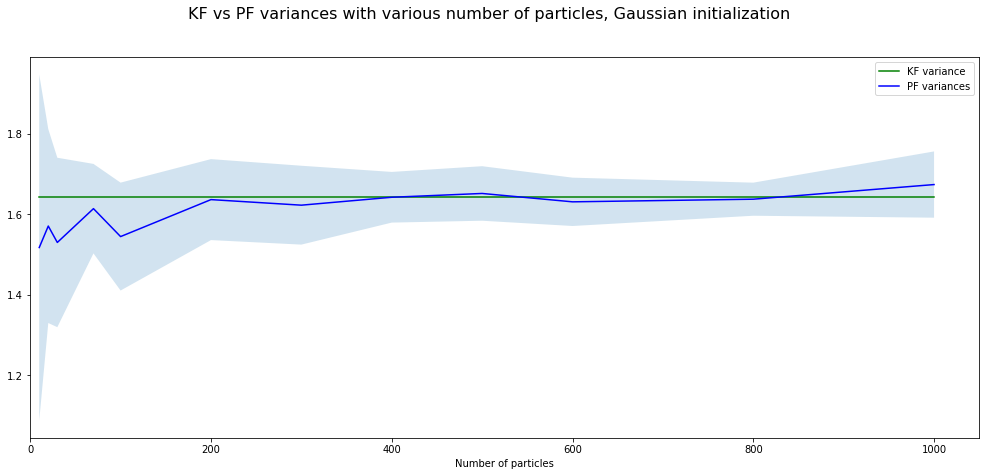

Final var of var (width):  0.08233526617805355


In [86]:
# simple_resample, 1/3
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000]#, 1100, 2000, 2200]
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10


model1 = SimpleModel(x_0, F, H, Q, R)
time = 50
measurements = [model1.measure(t) for t in range(time)]

def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo="simple_resample", x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q, measurements=measurements, neff_threshold=1/3)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)


kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R, measurements=measurements)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_vars[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

print("Final var of var (width): ", pf_vars_vars[-1])

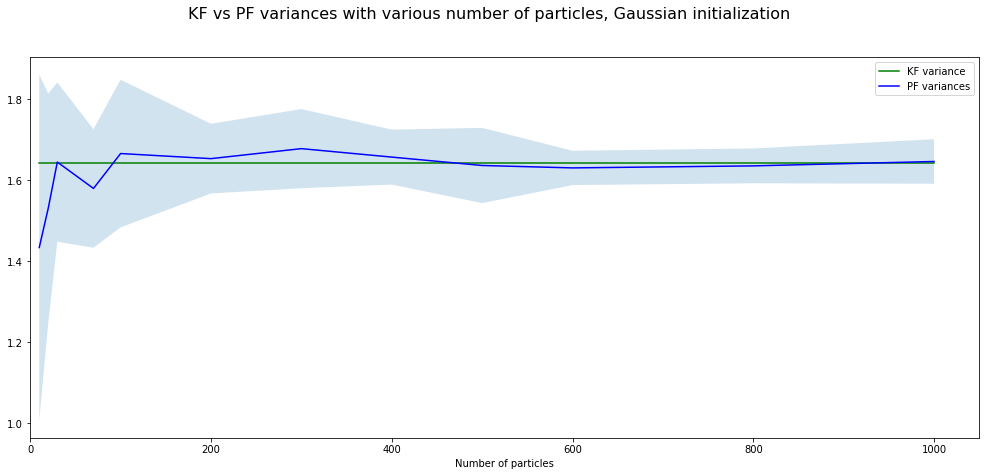

Final var of var (width):  0.05492513824268949


In [87]:
# stratified_resample, 1/3
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000]#, 1100, 2000, 2200]
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10


model1 = SimpleModel(x_0, F, H, Q, R)
time = 50
measurements = [model1.measure(t) for t in range(time)]

def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo="stratified_resample", x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q, measurements=measurements, neff_threshold=1/3)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)


kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R, measurements=measurements)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_vars[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

print("Final var of var (width): ", pf_vars_vars[-1])

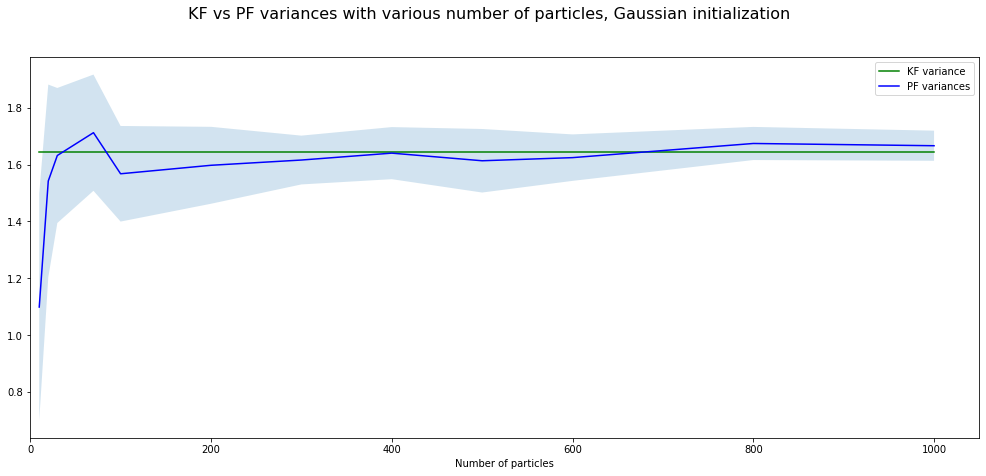

Final var of var (width):  0.05298626561136817


In [89]:
# residual_resample, 1/3
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000]#, 1100, 2000, 2200]
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10


model1 = SimpleModel(x_0, F, H, Q, R)
time = 50
measurements = [model1.measure(t) for t in range(time)]

def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo="residual_resample", x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q, measurements=measurements, neff_threshold=1/3)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)


kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R, measurements=measurements)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_vars[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

print("Final var of var (width): ", pf_vars_vars[-1])

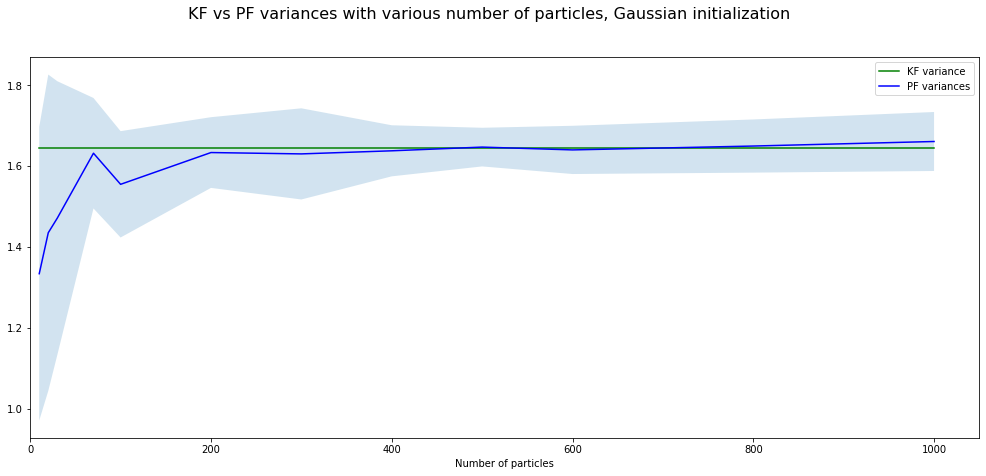

Final var of var (width):  0.07291474348203124


In [91]:
# residual_resample, 1/4
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000]#, 1100, 2000, 2200]
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10


model1 = SimpleModel(x_0, F, H, Q, R)
time = 50
measurements = [model1.measure(t) for t in range(time)]

def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo="residual_resample", x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q, measurements=measurements, neff_threshold=1/4)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)


kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R, measurements=measurements)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_vars[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

print("Final var of var (width): ", pf_vars_vars[-1])

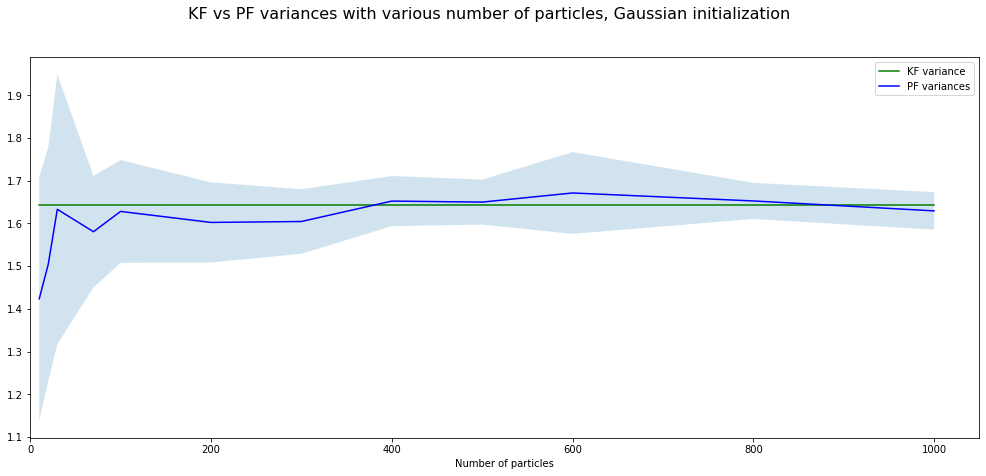

Final var of var (width):  0.04396703443363126


In [90]:
# residual_resample, 1/2
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000]#, 1100, 2000, 2200]
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10


model1 = SimpleModel(x_0, F, H, Q, R)
time = 50
measurements = [model1.measure(t) for t in range(time)]

def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo="residual_resample", x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q, measurements=measurements, neff_threshold=1/2)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)


kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R, measurements=measurements)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_vars[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

print("Final var of var (width): ", pf_vars_vars[-1])

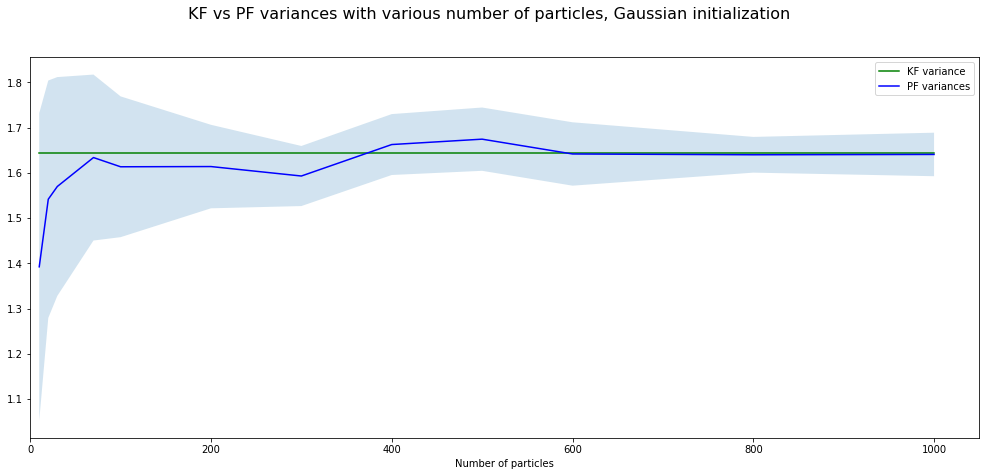

Final var of var (width):  0.048089367831532316


In [92]:
# residual_resample, 3/4
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000]#, 1100, 2000, 2200]
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10


model1 = SimpleModel(x_0, F, H, Q, R)
time = 50
measurements = [model1.measure(t) for t in range(time)]

def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo="residual_resample", x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q, measurements=measurements, neff_threshold=3/4)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)


kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R, measurements=measurements)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_vars[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

print("Final var of var (width): ", pf_vars_vars[-1])

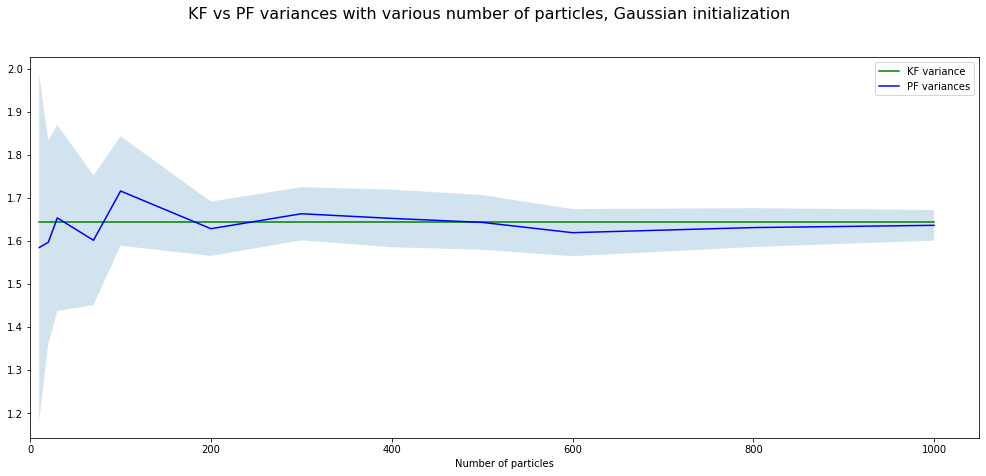

Final var of var (width):  0.03553397320589715


In [28]:
# systematic_resample, 1/2
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000]#, 1100, 2000, 2200]
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10


model1 = SimpleModel(x_0, F, H, Q, R)
time = 50
measurements = [model1.measure(t) for t in range(time)]

def test(N):
    pf = ParticleFilter(model1, N=N, resampling_algo="systematic_resample", x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q, measurements=measurements, neff_threshold=1/2)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)


kf1x = Kalman(model1, print_results=False, measurement_err_cov_matrix=model1.R, measurements=measurements)
kf_means, kf_vars, kf_likelihood = kf1x.run(time)
kf_var = np.mean(kf_vars[int(.2 * time):])

pf_vars = res[:, 1]
pf_vars_vars = res[:, 2]
times = range(len(particles_to_test))
fig = plt.figure()
fig.suptitle("KF vs PF variances with various number of particles, Gaussian initialization", fontsize=16)
ax = fig.add_subplot(111)

ax.plot(particles_to_test, [kf_var for _ in particles_to_test], 'g', label='KF variance')
ax.plot(particles_to_test, pf_vars, 'b', label='PF variances')

pfvar_neg = list(pf_vars - pf_vars_vars)
pfvar_pos = list(pf_vars + pf_vars_vars)
ax.fill_between(particles_to_test, pfvar_pos, pfvar_neg, alpha=0.2)
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
ax.legend()
plt.show()

print("Final var of var (width): ", pf_vars_vars[-1])

In [26]:
x_0 = np.array([0.])
F = np.array([[1.]])
H = np.array([[1.]])
Q = np.array([[1.]])
R = np.array([[1.]]) * 10


model1 = SimpleModel(x_0, F, H, Q, R)
time = 200
measurements = [model1.measure(t) for t in range(time)]

algos = ['simple_resample', 'residual_resample', 'stratified_resample', 'systematic_resample']
thresholds = np.round(np.linspace(.05, .95, 7), 2)
tests = [(threshold, algo) for threshold in thresholds for algo in algos]

def test(tup):
    thr, algo = tup
    pf = ParticleFilter(model1, N=1000, resampling_algo=algo, x_0=model1.states[0], 
                        print_results=False, measurement_err_cov_matrix=model1.R,
                       prior_cov_matrix=model1.Q, measurements=measurements, neff_threshold=thr)
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.sqrt(np.var(pf_variances[int(.2 * time):]))

    return var

with Pool(10) as p:
    res = p.map(test, tests)

res = np.array(res)

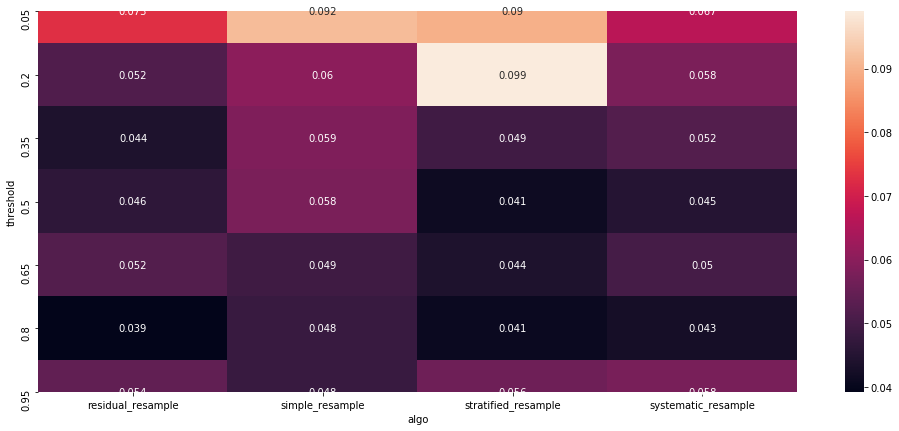

In [27]:
import pandas as pd
df = pd.DataFrame(tests, columns=['threshold', 'algo'])
df['result'] = res
df = df.pivot("threshold", "algo", "result")

pl = sns.heatmap(df, annot=True)

# Simple 2D example

In [16]:
x_0 = np.array([0., 0.])
F = np.array([[1., 1.], [0., 1.]])
H = np.array([[1., 0.], [0., 1.]])
Q = np.array([[1., 0.], [0., 1.]])
R = np.array([[20., 0.], [0., 5.]])

model2 = SimpleModel(x_0, F, H, Q, R)

In [17]:
pf2 = ParticleFilter(model2, N=500, resampling_algo='simple_resample', x_0=model2.states[0],
                    measurement_err_cov_matrix=model2.R, prior_cov_matrix=model2.Q)

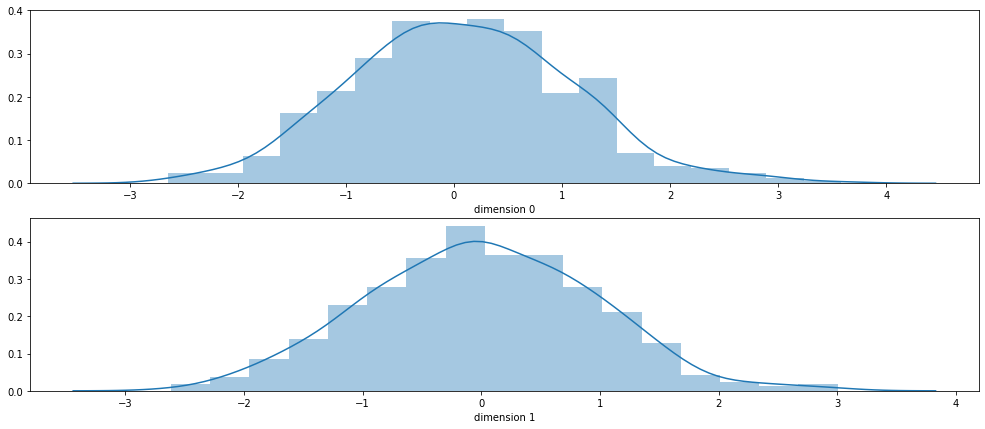

In [18]:
pf2.plot_particles()

..R..R...R..RR...R..R...R..RR...R.R.R..RRR...R..R end
Marginal likelihood:  -276.6191


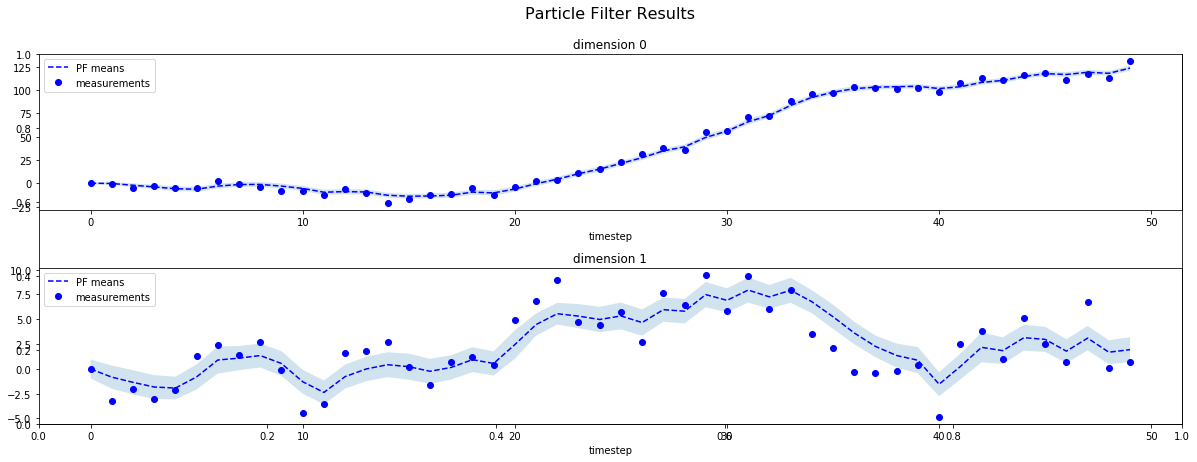

In [19]:
pf_means, pf_vars, pf_likelihood = pf2.run(50)

Loglikelihood:  -371.5451934796282


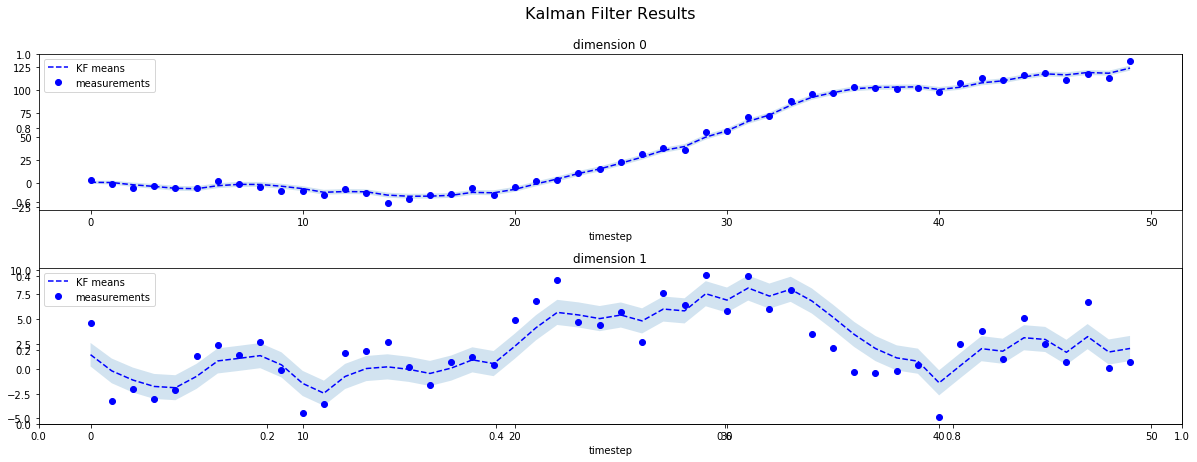

KF ran successfully


In [20]:
kf2 = Kalman(model2, print_results=True, measurement_err_cov_matrix=model2.R)
kf_means, kf_variances, kf_likelihood = kf2.run(time)

# Simple stochastic example

In [38]:
x_0 = np.array([100.])
b1 = 0.01
K1 = 1000

birth = Event(
    rate_calculator=lambda x: max(0, x[0] * b1 * (1 - float(x[0])/K1)),
    change_function=lambda x: [x[0] + 1]
    )

In [39]:
exact_model = lambda t: K1 * x_0[0] / (x_0[0] + np.e**(-b1*t) * (K1 - x_0[0]))

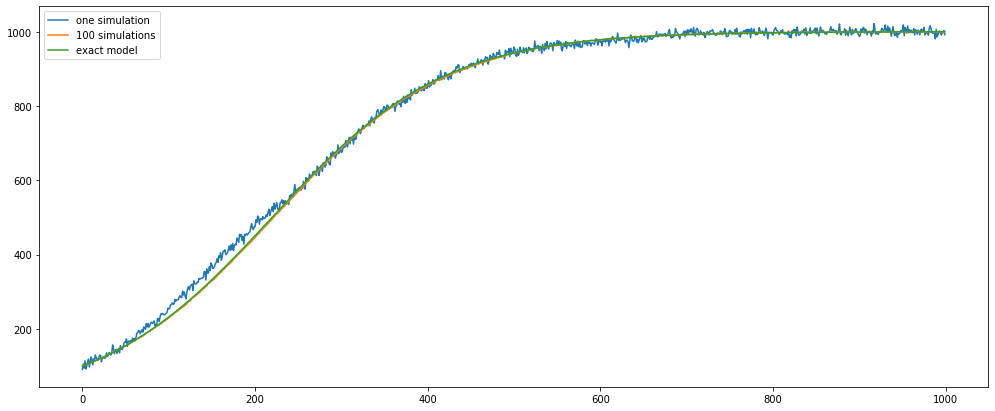

In [42]:
model3 = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[50.]]))

times = range(1000)
states = [model3.measure(t) for t in times]
plt.plot(times, states, label='one simulation')

exact = [exact_model(t) for t in times]

measurements = []
for _ in range(100):
    simulation_model = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[50.]]))
    measurements.append([simulation_model.measure(t) for t in times])
real_states = np.average(np.array(list(zip(*measurements))), axis=1)
plt.plot(times, list(map(lambda x: x[0], real_states)), label='100 simulations')
plt.plot(times, exact, label='exact model')
plt.legend()

In [10]:
particles_to_test = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 800, 1000, 1100, 2000, 2200, 5000]
time = 100

from multiprocessing import Pool
def test(N):
    pf = ParticleFilter(model3, N=N, resampling_algo='simple_resample', x_0=model3.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[50.]],
                       prior_cov_matrix=[[50.]])
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.var(pf_variances[int(.2 * time):])

    return (pf_variances, mean, var, pf_likelihood)

with Pool(10) as p:
    res = p.map(test, particles_to_test)

res = np.array(res)

R.....R.......R.....R.................R........................R...............R...........R.R..... end
R....R....R......R.....R..............R..................R...........R.......R..............R...... end
R.............R........R..........R......R....................R.......R........R.............R..... end
R............R.R..................R...R................R..............R........R............R.R.... end
R.........R....R..............R...............R.............R.........R.............R........R..... end
R.........R....R..................R...R..................R.........R...........R..........R...R.... end
R......R..R....R.................R............R................R...........R...........R.....R..... end
R......R..R....R.................R.............R................R..........R........R........R..... end
R......R..R....R..............R.............R............R........R..........R..............R.R.... end
R......R..R....R.................R.............R................

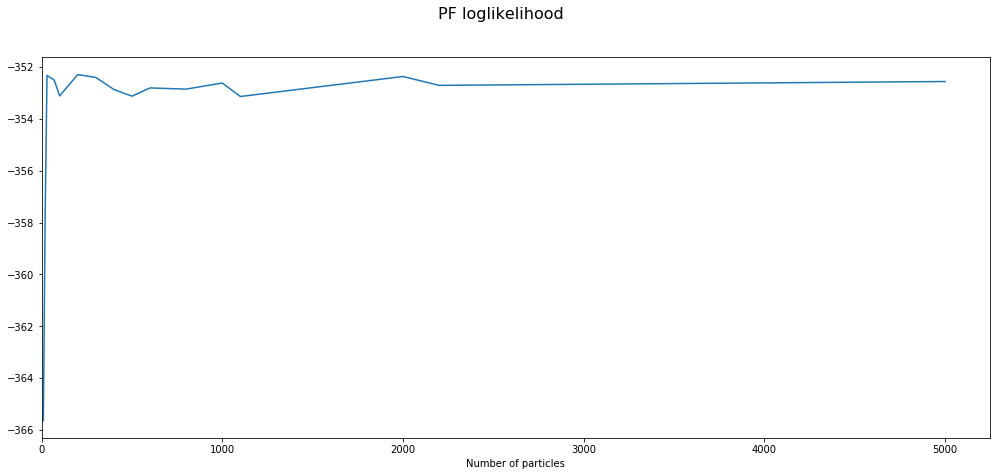

In [12]:
fig = plt.figure()
fig.suptitle("PF loglikelihood", fontsize=16)
ax = fig.add_subplot(111)
ax.plot(particles_to_test, res[:, 3])
ax.set_xlim(left=0)
ax.set_xlabel("Number of particles")
plt.show()

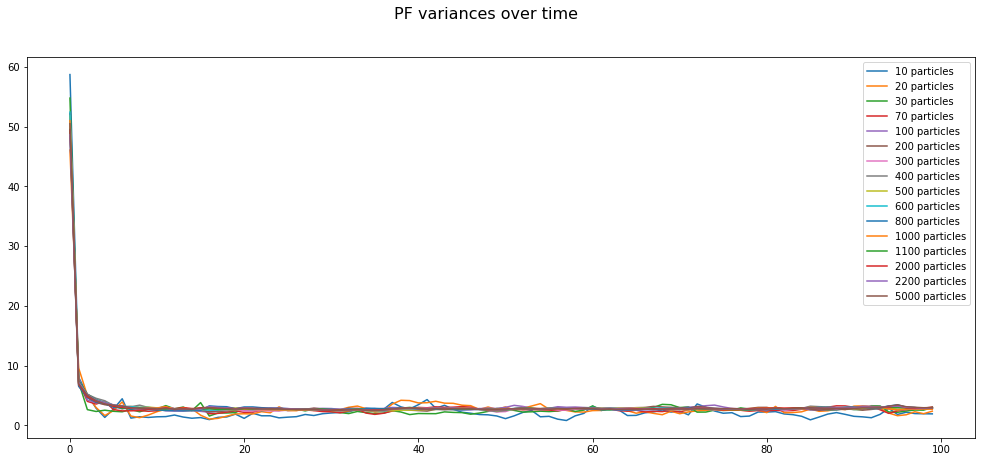

In [13]:
variances = res[:, 0]
times = range(time)
fig = plt.figure()
fig.suptitle("PF variances over time", fontsize=16)
ax = fig.add_subplot(111)
for nr in range(len(particles_to_test)):
    ax.plot(times, variances[nr], label=str(particles_to_test[nr])+" particles")
ax.legend()
plt.show()

### 15M ops (1000 * 500 * 30) = 6m 37s

In [26]:
Rs = [10. * x for x in range(1, 31)]
time = 500

from multiprocessing import Pool
def testR(R_):
    pf = ParticleFilter(model3, N=300, resampling_algo='simple_resample', x_0=model3.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[R_]],
                       prior_cov_matrix=[[50.]])
    _, pf_variances, pf_likelihood =  pf.run(time)
    mean = np.mean(pf_variances[int(.2 * time):])
    var = np.var(pf_variances[int(.2 * time):])

    #return (pf_variances, mean, var, pf_likelihood)
    return pf_likelihood

with Pool(10) as p:
    res = p.map(testR, Rs)

res = np.array(res)

Running PF with 300 particles: R...R........R.......................R...........................R.................R....................R............R.........R....................R...................R..............R..................R.............R.................R......R..................R....................R.......................R..........................R..............................R.....R..................R..............................R.............................R................R................................ end
Running PF with 300 particles: R..R.......R...................R.......R............R................R............R.............R..........R.............R...........R...........R....R..............R.......R...........R..........R.............R............R.........R......R...........R................R...........R................R.R.........R..................R............R.....................R..R..........R...............R............R...................R......

Running PF with 300 particles: R....R....................R....................R.................................R.................R.........................R........................R......................R..............R........................R....................R........R............................R..................................R...............................R.............................R......................................R...................................................R...................................... end
Running PF with 300 particles: .R.....R.....................R............................R........................R.........................R...................R............................R................R.......................R..................R......................R...........................R..............................R.............................R.................................R....................R.........................................R......

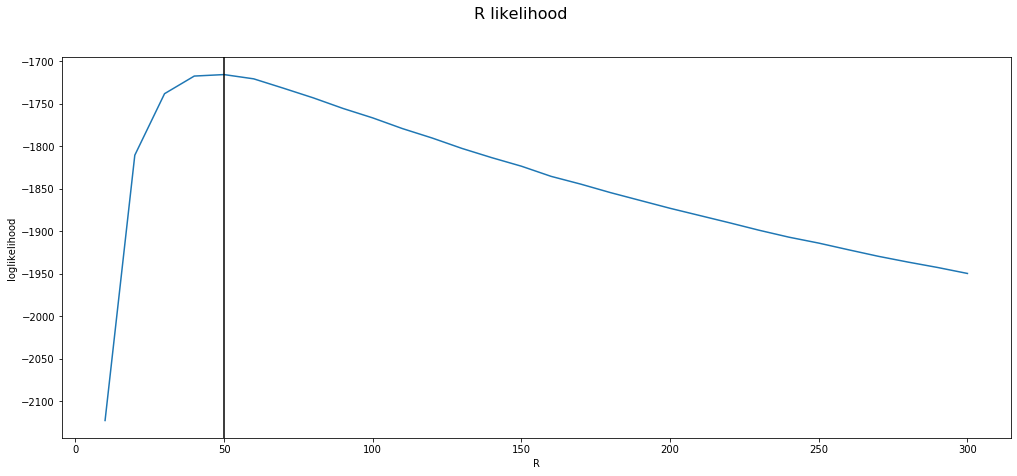

In [29]:
fig = plt.figure()
fig.suptitle("R likelihood", fontsize=16)
ax = fig.add_subplot(111)
ax.plot(Rs, res)
ax.axvline(x=50, color='k')
ax.set_xlabel("R")
ax.set_ylabel("loglikelihood")
plt.show()

# Parameter guessing

In [9]:
x_0 = np.array([100.])
b1 = 0.010
K1 = 1000

birth = Event(
    rate_calculator=lambda x: max(0, x[0] * b1 * (1 - float(x[0])/K1)),
    change_function=lambda x: [x[0] + 1]
    )

model_real = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[50.]]))


possible_b1s = [0.001 * x for x in range(5, 15)]
possible_Ks = [100 * x for x in range(5, 15)]
possible_Rs = [10. * x for x in range(1, 10)]
tests = [(b, k, r) for b in possible_b1s for k in possible_Ks for r in possible_Rs]

time = 100
measurements = [model_real.measure(t) for t in range(time)]



def test_b(tup):
    b, k, r = tup
    test_event = Event(
            rate_calculator=lambda x: max(0, x[0] * b * (1 - float(x[0])/k)),
            change_function=lambda x: [x[0] + 1]
            )
    
    test_model = StochasticModelTauLeaping(x_0, events=[test_event], step_size=1, 
                                   measurement_error_covariance=np.array([[r]]))
    
    pf = ParticleFilter(test_model, N=100, resampling_algo='simple_resample', x_0=test_model.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[r]],
                       prior_cov_matrix=[[50.]], measurements=measurements)
    
    _, _, pf_likelihood =  pf.run(time)
    
    return pf_likelihood

with Pool(10) as p:
    res = p.map(test_b, tests)

res = np.array(res)

Running PF with 100 particles: R................R...R........R......R.....R.....R........R....R...........R.....R......R.....R...R end
Running PF with 100 particles: R.........R.........R.......R..R.....R...R.......R........R...R.............R......R....R.....R..R. end
Running PF with 100 particles: RR.R.....R.......R.RR....RR..RR.RR...R.R...RR...R..R..R...R...R...R.R..R..RRR......R...RR....R.R.R. end
Running PF with 100 particles: R..............R.....R......R..R.....R.....R......R.......R...R.......R.....R....R.....R.R.....R..R end
Running PF with 100 particles: R........R.........R.R....R...R.R....R...R......R..R......R..R......R...R...R...R..R...R.R...R.R..R end
Running PF with 100 particles: R.............R.....R.......R...R......R........R....R.....R...R......R.....R...R....R..R..R...R..R end
Running PF with 100 particles: R.........R.........R.......R..R....R...R.......R..R.......R...R...........R.R....R....R.R.....R..R end
Running PF with 100 particles: RR.RR.....R......R.RR...

Running PF with 100 particles: R.........R..........R.......R...R....R...R.....R...R......R..R.....R.....R.R..R.....R...R...R..R.. end
Running PF with 100 particles: R.........R..........R........R.....R....R.......R.........R........R.......R......R.....R......R.. end
Running PF with 100 particles: R.........R.........R.........R....R.......R.......R.........R.............R..R.......R..R.....R... end
Running PF with 100 particles: RR.RR.R..R.........RR.....R...R...R....R........R..R......R..R.......R......R..R.......RR.....R..R. end
Running PF with 100 particles: RRRRR...RR.....R...RR.....R...R.R..R...R...RR...R..R..R...R..R....R..R.....RR..R...R...RR....R.R.R. end
Running PF with 100 particles: R................R...R......R.R...R....R...R.....R..R....R..R.R....R..R..R..R...R..R...R.R..R.R..R. end
Running PF with 100 particles: R..........R........R.......R..R...R...R........R....R.......R.........R....R.....R.....R.....R...R end
Running PF with 100 particles: R................R...R..

Running PF with 100 particles: RR..R.............R.R.......R.R...R....R........R..R......R...R........R.....R.....R....R....R...R. end
Running PF with 100 particles: R........R........R.R.....R...R...R...R.R..R....R..R......R...R.....R..R....R..R..R...R.R.R..R.R.R. end
Running PF with 100 particles: R........R..........R........R.R.........R........R.........R..R...........R.R.........R.R......R.. end
Running PF with 100 particles: R..............R....R.....R....R.....R.....R.......R.........R.........R.....R.........R.....R...R. end
Running PF with 100 particles: R...................R........R....R....R......R...R.......R....R.........R.....R......R.R......R..R end
Running PF with 100 particles: RR.R......R.......R.R.....R...R.....R..R........R..R.......R..R.......R.....R......R....R.R....R.R. end
Running PF with 100 particles: R............R.....R.R.......R..R....R.....R....R..R......R..R......R....R..R...R....R..R...R..R..R end
Running PF with 100 particles: R........R...........R..

Running PF with 100 particles: R.................R....R......R......R.....R.....R........R....R.......R.....R.........R....R..R... end
Running PF with 100 particles: RR.R.....R.......R.RR..R..R..RR.R....R.R...RR...R.RR...R..R..RR.....R.R....RR..R...R...RR.....R.RR. end
Running PF with 100 particles: RR.R......R........R.R....R...R...R....R........R..R......R..R.......R.....RR..R...R....R....R.R.R. end
Running PF with 100 particles: RR.RR....R.......R.RR.....R...R.R....R.R.....R..R.RR..R...R..R....R..R.....RR......R.R.RR....R.R.R. end
Running PF with 100 particles: R..........R........R.......R..R.....R...R.......R.........R.........R......R......R....R....R....R end
Running PF with 100 particles: R.........R..........R......R..R...R...R...R....R..R......R..R.......R.....R.R....R....R.R....R..R. end
Running PF with 100 particles: R..........R........R.......R...R......R........R..R.......R...........R.......R........R.....R..R. end
Running PF with 100 particles: R............R......R...

Running PF with 100 particles: R...............R...R.........R........R............R............R............R.........R........R. end
Running PF with 100 particles: R..R....RR.....R...RR....RRR..R......R...R..R...R..R..R...R...R..R...R....RRR.....R....RR....R.R.R. end
Running PF with 100 particles: RR..R...............R.........R......R.....R......R..........R.............R.R.........R.R.......R. end
Running PF with 100 particles: RR.R.....R.........R.R...RR...R........R........R.....R....R.......R.......RR........R..R........R. end
Running PF with 100 particles: R.......R...........R.........R......R...........R...........R..............R............R......... end
Running PF with 100 particles: R..........R..............R.......R.......................R..................R...................R. end
Running PF with 100 particles: R.......R..........R........R...R........R.........R..........R.............R..........R.....R....R end
Running PF with 100 particles: R........R..........R...

Running PF with 100 particles: RR.R...........R....R.....R...R........R........R.....R...R...R...R....R....R..........RR......R... end
Running PF with 100 particles: RR.RR....R.......R.RR.....R...R...R....R.....R..R..R..R...R...R..R..R.....R.R.....R....RR.R...R..R. end
Running PF with 100 particles: RR..R..............R.R........R........R.........R.........R.......R........R...........R.......R.. end
Running PF with 100 particles: R................R........R.....R...............R...............R.....................R...R........ end
Running PF with 100 particles: R.................R.......R.....R...............R..........R.............R.........R...........R... end
Running PF with 100 particles: RR.................R......R.....R......R........R.........R...R.............R..........R..R.......R end
Running PF with 100 particles: RR.RR....R.....R...RR.....R...R.RR.R...R.....R..R..R..R...R..R....R..R....RRR......R.R.RR....R.R.R. end
Running PF with 100 particles: R............R......R...

Running PF with 100 particles: R......R.............R..........R................R............R...................R.......R........ end
Running PF with 100 particles: R.............R...........R..........R.............R...........................R..............R.... end
Running PF with 100 particles: RR..R.R...R.R.....R.R....RR...R.RR...R...R..R...R..R..R...R..RR..R...R....RRR......R.R.RR.....R..R. end
Running PF with 100 particles: R........R..........R.........R..........R..............R.....R...........R........R..........R.... end
Running PF with 100 particles: RR.R......R........R.R.......RR......R...R......R..R......R...R...R....R....R..........RR.....R..R. end
Running PF with 100 particles: R......R.............R.........R.......R.........R...........R..............R..........R......R...R end
Running PF with 100 particles: RR..R.............R.R.....R...R......R.....R......R........R..R.............R..........R.R.......R. end
Running PF with 100 particles: R........R..........R...

Running PF with 100 particles: R.............R......R.........R................R.............R..............R..........R.......... end
Running PF with 100 particles: R...................R.........R........R...........R..........R...............R.........R......R... end
Running PF with 100 particles: RR.R........R.....R.R........RR........R....R....R.......RR...R...R........RR.........RR.R..R....R. end
Running PF with 100 particles: R................R.....R......R...R.............R............R..............R...........R......R... end
Running PF with 100 particles: R...........R.......R........RR........R.........R........R...R.............R.....R.....R....R...R. end
Running PF with 100 particles: R.........R...............R.....R..........R........R.........R..............R..........R.....R.... end
Running PF with 100 particles: RR..R.R..R.......R.RR....RR...R.RR.....R.....R..R.....R...R...R..R...R....RRR......R.R.RR....R...R. end
Running PF with 100 particles: R................R..R...

Running PF with 100 particles: R.........R....................R......................R...................R.............R.......... end
Running PF with 100 particles: R.......R...........R.........R..............R..........R.........R...............R............R... end
Running PF with 100 particles: R....R.............R......R.....R................R...........R...............R...........R.......R. end
Running PF with 100 particles: RR.R....RR.....R...RR....RR...R...R....R....R...R.....R...R...R..R.R...R..R.R........R.RR....R...R. end
Running PF with 100 particles: R.......R............R..........R..................R..............R...................R........R... end
Running PF with 100 particles: RR..R...R.R.R......R.R...RR....R.........R..R....R....R....R......R.......R.R........R..R......R... end
Running PF with 100 particles: RR..R.......R.......R.........R..........R.......R........R.......R.........R........R...R......... end
Running PF with 100 particles: R.........R.............

Running PF with 100 particles: RR..R.R..R..R......RR....RRR..R.....R.....R.R...R.....R...R...R.R.R......R..R....R...R.RR..R....RR. end
Running PF with 100 particles: RR.R......R........RR.....R...R........R........R.....R....R......R.......R.R..........R.R.......R. end
Running PF with 100 particles: R......R..................R............R...................R.................R................R.... end
Running PF with 100 particles: RR..R............R..R.........R............R.R.....R..R......R....R.........R.........R.R.........R end
Running PF with 100 particles: R...................R...........R..................R..............R...................R..........R. end
Running PF with 100 particles: R...............R...R..........R.............R..........R....R..............R............R......... end
Running PF with 100 particles: R.............R................R........................R.................R.....................R.. end
Running PF with 100 particles: R.......R...........R...

Running PF with 100 particles: R............R.................R...................R.......................R.............R......... end
Running PF with 100 particles: R.......R...........R.........R...............R.......R...........R............R........R.......... end
Running PF with 100 particles: R............R................R.....................R.....................R..............R......... end
Running PF with 100 particles: R.................R...........R.................R..........R................R...........R........R. end
Running PF with 100 particles: RR.RR.R...R.R......RR...RRRR..R....R...R....R...R.....R...R...R.RR.R...R.R..R....R....RRR...R..R... end
Running PF with 100 particles: R...........R.............R..................R................R........R..............R..........R. end
Running PF with 100 particles: RR.R........R.......R....RR.....R.........R.....R.....R....R......R.......R.R........R..R........R. end
Running PF with 100 particles: R............R..........

Running PF with 100 particles: RR.RR.R...R.R.....R.R....RR...R........R....R...R.....R...R...R.R.R......R..R.......R..RR...R..R... end
Running PF with 100 particles: RR..........R........R..........R..................R..........R..........R.....................R... end
Running PF with 100 particles: RR..R...R.........R.R......R..R........R.....R..R.....R...R.......R.........R...........R......R... end
Running PF with 100 particles: R......R.............R.................R....................R...................R.............R.... end
Running PF with 100 particles: RR..R...........R...R....RR.....R...........R.........R.......R..R........R.R........R...R......... end
Running PF with 100 particles: R...........R.......................R...................R.................R................R....... end
Running PF with 100 particles: R....R..............R...........R...............R..........R.............R...........R..R.......... end
Running PF with 100 particles: R...........R...........

Running PF with 100 particles: R....R........R........................R..............R............R..............R................ end
Running PF with 100 particles: R....R........R..............R............R..........RR...........R.......R.........R.......R...... end
Running PF with 100 particles: R........R....................R................R.................R.......R..........R.............. end
Running PF with 100 particles: R.............R..............R..............R...........R.........R.......R...........R..........R. end
Running PF with 100 particles: RR..R.R...R.R.......R.R..RRR..R..R....RR..R.R...R....RR...R...R.RRR.....R.R.R..R.R...R.R...R.....R. end
Running PF with 100 particles: R.......R................R................R........R..R..........R......R........R....R.........R.. end
Running PF with 100 particles: RR..........R........R...RR.........R........R........R.......R..R.......R........R......R.....R... end
Running PF with 100 particles: R............R..........

Running PF with 100 particles: R.......R............R..........R...............R.............R..........R.........R.............R. end
Running PF with 100 particles: RR.RR...RR..R......RR....RR...R.....R.....R.R...R.....R...R...R.R.R......RR.R...R...R..R.R.R.....R. end
Running PF with 100 particles: RR..R...RR......R...R....RR.....RR........R..R.....R..R....R.....RR......R..R....R...R..R...R...... end
Running PF with 100 particles: R.......R................R..................R...........R.........R..............R...............R. end
Running PF with 100 particles: R...................R......................R................R.............R..............R......... end
Running PF with 100 particles: R......R............R....RR..............R..R.........R..........R......R.R.........R....R..R...... end
Running PF with 100 particles: R.......R............R...R..........R.......R.........R..........R....R...R......R...R......R...... end
Running PF with 100 particles: R...........R...........

Running PF with 100 particles: R...........R..............R..............R...........R..........R......R........R....R..........R. end
Running PF with 100 particles: R...............R...............R..............R..................R.......R...........R............ end
Running PF with 100 particles: RR..R...R...........R.........R.............R.........R..........R.......R........R.....R.......... end
Running PF with 100 particles: R.....R.....................R................R...................R........R..............R......... end
Running PF with 100 particles: R..............R.....................R................R...........R.............R....R............. end
Running PF with 100 particles: RR........R....R..............R.............R.........R..........R....R...R.........R.......R...... end
Running PF with 100 particles: R.......R............R..........R............R..........R.........R..............R..........R...... end
Running PF with 100 particles: RR.R....RR..R......RR...

In [19]:
tests = np.array(tests)
d = list(zip(tests[:, 0], res))

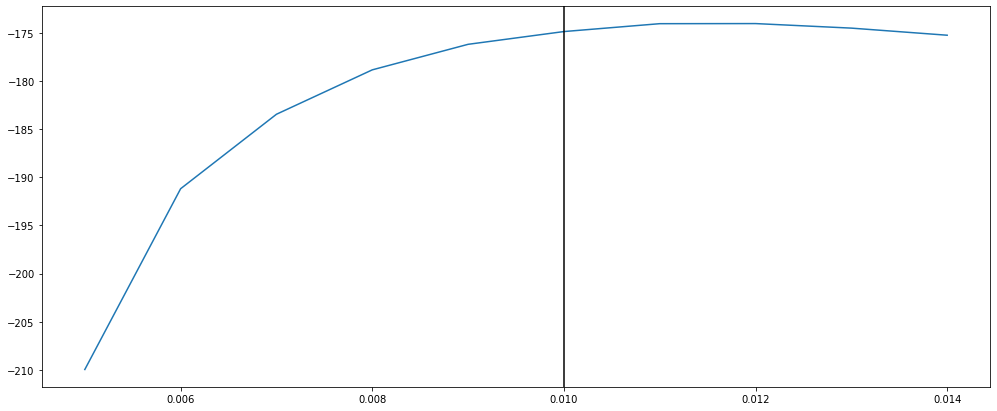

In [32]:
d2 = np.array([(x,np.average(list(filter(lambda tup:tup[0]==x, d)))) for x in possible_b1s])
plt.plot(d2[:, 0], d2[:, 1])
plt.axvline(x=b1, color='k')

Running PF with 100 particles: R..R........................R.....R....R..R..R..R..R..R..R.R.R.R.R.R.R.R.RRR.R.R.R.RR.R.R.RRR.RRRRR end
Running PF with 100 particles: R..R..........R..................R....R..R....R..R..R..R..R...R.....R..R.R.R...R.R..R..R..R..R.R.R. end
Running PF with 100 particles: R..R............R.................R........R......R...R.......R.......R....R.....R........R....R.R. end
Running PF with 100 particles: R..R..........R...................R............R....R.........R......R.....R.....R............R..R. end
Running PF with 100 particles: R..R..........R................R........R..........R.........R........R.......R........R.........R. end
Running PF with 100 particles: R..R..........R...................R......R......R...R....R....R......R....R...R..R.....R.......R..R end
Running PF with 100 particles: R..R........................R.....R....R.R..R..R..R..R..R..R..R...R.R.R.R.R.R.R.R.R.R.R.RRR.R.R.R.R end
Running PF with 100 particles: R..R............R.......

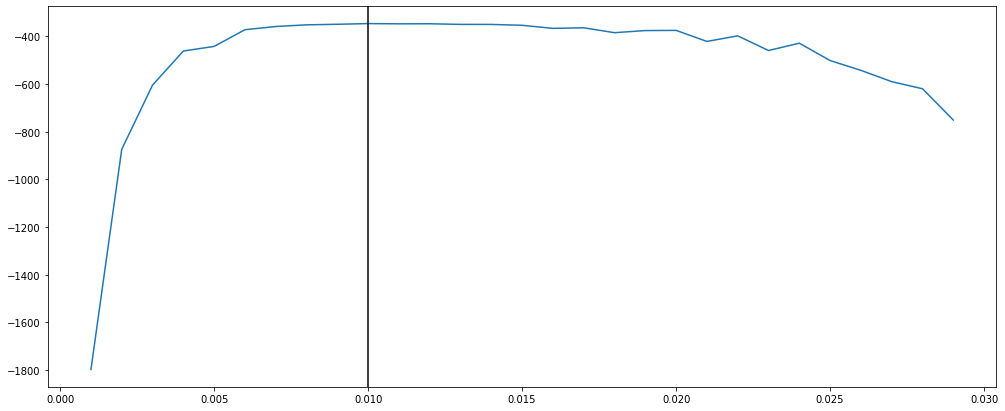

In [6]:
x_0 = np.array([100.])
b1 = 0.010
K1 = 1000
R = 50.

birth = Event(
    rate_calculator=lambda x: max(0, x[0] * b1 * (1 - float(x[0])/K1)),
    change_function=lambda x: [x[0] + 1]
    )

model_real = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[R]]))


possible_b1s = [0.001 * x for x in range(1, 30)]
possible_Ks = [K1]
possible_Rs = [R]
tests = [(b, k, r) for b in possible_b1s for k in possible_Ks for r in possible_Rs]

time = 100
measurements = [model_real.measure(t) for t in range(time)]



def test_b(tup):
    b, k, r = tup
    test_event = Event(
            rate_calculator=lambda x: max(0, x[0] * b * (1 - float(x[0])/k)),
            change_function=lambda x: [x[0] + 1]
            )
    
    test_model = StochasticModelTauLeaping(x_0, events=[test_event], step_size=1, 
                                   measurement_error_covariance=np.array([[r]]))
    
    pf = ParticleFilter(test_model, N=100, resampling_algo='simple_resample', x_0=test_model.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[r]],
                       prior_cov_matrix=[[50.]], measurements=measurements)
    
    _, _, pf_likelihood =  pf.run(time)
    
    return pf_likelihood

with Pool(10) as p:
    res = p.map(test_b, tests)

res = np.array(res)

plt.plot(possible_b1s, res)
plt.axvline(x=b1, color='k')

Running PF with 500 particles: R.......R.........R.R.......R...R....R...R.R...R...R...R.......R.R.R..R..R...R..R.R.R..R..R..R.R.R..RR.R.RR.R.RR.R.R..R..R.R..R.....R.R..R..R..R..R..R.R..R.R.R..R.R..R.R.R..R.R.R.R...R.R.R..R.R..R.R..R.R.R..R.R..RR..R.R..R.R..R.R.R..R.R.R..R.RR....R..R...R..R.R.R.R.R..R.R.R.R.RRR..R.R.R..R..R.R.R.R.R...R.R..R..R.R.R..R.R.R.R.R.R.R..R..R.R..RR..R.R.R..R.R.R.RR.R.R..R.R..R..R..R.R..R..R..R...R.R..R.R..R..R...R...R..R..R..R..R.R..R.R.R...R...R..R.R....R...R......R.R....R.....R.....R......R.......R....R......R.....R....................R.........R.....R.....R..........R....R.....R.............R.......R.............R....R..............R......R........R................R................R............................R.................................................R.................................R........................................................................................................................................R...............................

Running PF with 500 particles: R.....R.............R..........R...........R...........R.........R....R...........R.............R.R....R..R.R...R.............R....R.....R.............R.....R.....R....R......R...........R........R........R.......R....R.........R...........R..R.............R.....R.......R...R...R............R..R.R...............R........R........R......R....R......R......R...R.............R.............R.........R.................R.........R.......R.........R........................R..........................R..R...............R......R.........................R.....................R............................R..................R.............R.........R............................R..............................................................................................R.........................................................................................................................................................R...............................................

Running PF with 500 particles: R...R...R........R.......R........R....R.....R....R......R..R..R.........R.R..R.......R.R....R......R.........R....RR..R..R.R..R.R.R..R.R.R..R..R..R.R..R...R...R....R....R.R.R...R..R.R..R..R...RR...R...R...R.R.R...R..R.....RR.R....R.R.R..R......RR.R.R.R.R.R..R....R..R....R....R...R..R.RR.....R......R.R.R..R...R..R..R.R...R...R....R....R...R......R.......R........R...R.R......R....R..R....R.....R.......R....R....R.........R........R.....R.........R...R.....R.......R..........R.....R.........R.R.............R..........R....R...........R.....R.................R..........................R..................R.................................R..........................................................................................R..........................................................................................................................................................................................................................................

Running PF with 500 particles: R...R..R....R...R....RR...R..R...R.R..R.R...R...R.R..R..RR.R.R..R...R...R.R.R.R...R..R.RR.RR.RR...R.R..RR....R.R..R.R.RRR.RRR..RRRRR.R.R.RR.RRR.RR.R.R.R.R.RR.RRR.R.R.R.RR.RRR..RRR.RRRR.R.R.R.R.RR.RRRRR.RR.RRRR.R.R.RR.R.RR.RRRR.R..RR.RRRR.R.R.R..RR.R.R.RRR.R.RR.R.RR.RRR.R.RR..R.R.RR.R.R.R..R.R.R....R.R.R.R.R.RR.R.R.RR.R.R.R.R.R.R..R..RR..R.R...R..R...R..R..R....R.R.R.RR.R...R..R..R.R..R..R.R...R...R.R..R.R..R..R..R....R.R..R...R.....R...R........R..R...R..R..R....R....R...R....R...R..R.....R.R.......R...R........R...R.R...R.....R.......R....R............R....R....................R.......R.............R.......R..............................................R.............................................R....................................................................................................................................................................................................................................................................

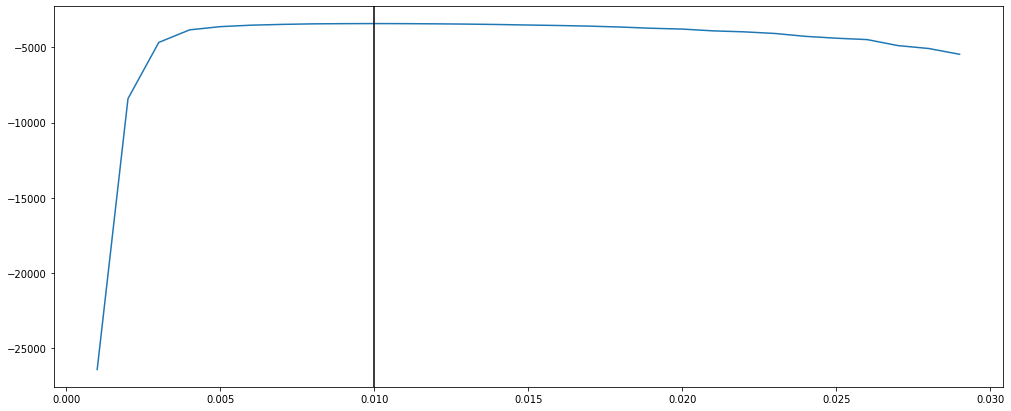

In [3]:
x_0 = np.array([100.])
b1 = 0.010
K1 = 1000
R = 50.

birth = Event(
    rate_calculator=lambda x: max(0, x[0] * b1 * (1 - float(x[0])/K1)),
    change_function=lambda x: [x[0] + 1]
    )

model_real = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[R]]))


possible_b1s = [0.001 * x for x in range(1, 30)]
possible_Ks = [K1]
possible_Rs = [R]
tests = [(b, k, r) for b in possible_b1s for k in possible_Ks for r in possible_Rs]

time = 1000
measurements = [model_real.measure(t) for t in range(time)]



def test_b(tup):
    b, k, r = tup
    test_event = Event(
            rate_calculator=lambda x: max(0, x[0] * b * (1 - float(x[0])/k)),
            change_function=lambda x: [x[0] + 1]
            )
    
    test_model = StochasticModelTauLeaping(x_0, events=[test_event], step_size=1, 
                                   measurement_error_covariance=np.array([[r]]))
    
    pf = ParticleFilter(test_model, N=500, resampling_algo='simple_resample', x_0=test_model.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[r]],
                       prior_cov_matrix=[[50.]], measurements=measurements)
    
    _, _, pf_likelihood =  pf.run(time)
    
    return pf_likelihood

with Pool(10) as p:
    res = p.map(test_b, tests)

res = np.array(res)

plt.plot(possible_b1s, res)
plt.axvline(x=b1, color='k')

/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.l

Running PF with 300 particles: R................R...R......R.......R.....R...R.....R..R....R.R.R...R.R..R..R.R.R.R.R..R..R.R.R.R.R.R.RRRRRR.R.RR.R.R.R.RR.RRRR.R..RRRRRR.......................................................................................................................................................................................................................................................................................................................................................................... end
Running PF with 300 particles: RRRRRRRRRR........................................................................................................................................................................................................................................................................................................................................................................................................................................

/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)


Running PF with 300 particles: RRRRRRRRRR......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... end
Running PF with 300 particles: RRRRRRR...........................................................................................................................................................................................................................................................................................................................................................................................................................................

Running PF with 300 particles: RRR................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................ end
Running PF with 300 particles: RRR...............................................................................................................................................................................................................................................................................................................................................................................................................................................

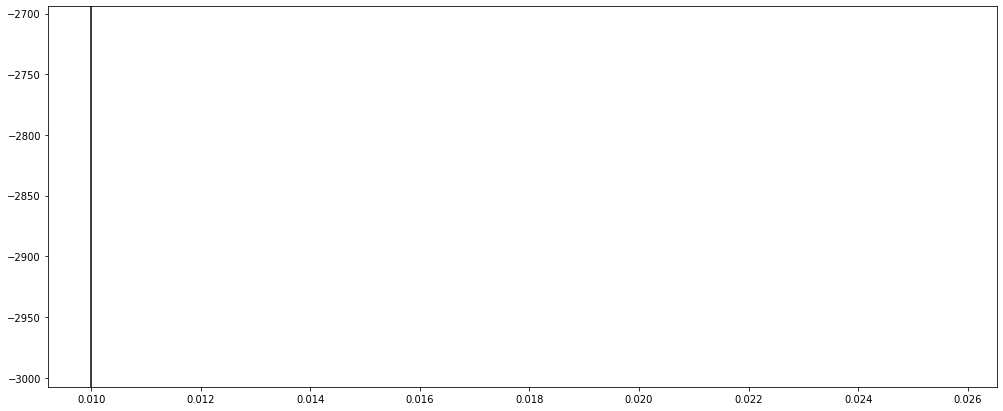

In [5]:
x_0 = np.array([100.])
b1 = 0.010
K1 = 1000
R = 50.

birth = Event(
    rate_calculator=lambda x: max(0, x[0] * b1 * (1 - float(x[0])/K1)),
    change_function=lambda x: [x[0] + 1]
    )

model_real = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[R]]))


possible_b1s = np.linspace(0.0001, 1, 40)
possible_Ks = [K1]
possible_Rs = [R]
tests = [(b, k, r) for b in possible_b1s for k in possible_Ks for r in possible_Rs]

time = 500
measurements = [model_real.measure(t) for t in range(time)]



def test_b(tup):
    b, k, r = tup
    test_event = Event(
            rate_calculator=lambda x: max(0, x[0] * b * (1 - float(x[0])/k)),
            change_function=lambda x: [x[0] + 1]
            )
    
    test_model = StochasticModelTauLeaping(x_0, events=[test_event], step_size=1, 
                                   measurement_error_covariance=np.array([[r]]))
    
    pf = ParticleFilter(test_model, N=300, resampling_algo='simple_resample', x_0=test_model.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[r]],
                       prior_cov_matrix=[[50.]], measurements=measurements)
    
    _, _, pf_likelihood =  pf.run(time)
    
    return pf_likelihood

with Pool(10) as p:
    res = p.map(test_b, tests)

res = np.array(res)

plt.plot(possible_b1s, res)
plt.axvline(x=b1, color='k')

In [7]:
list(zip(possible_b1s, res))

[(0.0001, -inf),
 (0.025738461538461536, -2850.7985920164365),
 (0.05137692307692308, -inf),
 (0.07701538461538461, -inf),
 (0.10265384615384615, -inf),
 (0.12829230769230768, -inf),
 (0.1539307692307692, -inf),
 (0.17956923076923076, -inf),
 (0.20520769230769229, -inf),
 (0.2308461538461538, -inf),
 (0.25648461538461537, -inf),
 (0.2821230769230769, -inf),
 (0.3077615384615384, -inf),
 (0.3334, -inf),
 (0.35903846153846153, -inf),
 (0.384676923076923, -inf),
 (0.4103153846153846, -inf),
 (0.43595384615384614, -inf),
 (0.46159230769230764, -inf),
 (0.4872307692307692, -inf),
 (0.5128692307692307, -inf),
 (0.5385076923076922, -inf),
 (0.5641461538461539, -inf),
 (0.5897846153846154, -inf),
 (0.6154230769230769, -inf),
 (0.6410615384615385, -inf),
 (0.6667, -inf),
 (0.6923384615384615, -inf),
 (0.7179769230769231, -inf),
 (0.7436153846153846, -inf),
 (0.7692538461538461, -inf),
 (0.7948923076923077, -inf),
 (0.8205307692307692, -inf),
 (0.8461692307692307, -inf),
 (0.8718076923076923, -i

/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)


Running PF with 300 particles: RR.R.............R...R...R......R....R.R..R..R...R..R.R.R.R..R..R.R.R..R.R.R.R.R.RRR.R.RR.R.R.RR.R.R.R.R.R.RRRRR.R.RR.RRRRRRRR.RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR.RRRRRRRRRRRRRRRRRRRRR.R.RRRRRR.RRRRRR.RR.RR.RR.RRRRRRRR.RRR.R.R.R.RRRRRRRRR.R.RRR.R.R.RRRRR.RRRR.RRRRRRR.R.RRRR.R.RRR.R.R.R.RR.R.R.R.R.R.R.R.R..R.R.R.R.R.R.R.R..R...R..R..R. end
Running PF with 300 particles: RR.R................R.....R.....R...R.R.R..R..R...R..R..R.R..R...R.R.R..R.R.R..R.R.R.R.R.R.R..R.R.R.R.R.R..R.R..RRR.RRR.R.R.RRR..R................................................................................................................................................................................................................................................................................................................

Running PF with 300 particles: R.....R...R.........R....R..R.....R.......R..R.R.......R...R..R.R...R.R...R....R.....R.R...R.R..R.R.R.R..R...R.RR.R..R...R.R..R......R.R....R....R..R.R...R...R...R..R..R..R.R.R..R.R..R...R..R.R...R.R.R....R.R....R...R..R.R....R..R.R.R..R.R.R.RR...R..R.R.R..R...R..R...R.R.RR..R..R..R.R.....RR.R..R..R..R......R..R.R..R.R..R.R.R.R.R..R...RR.R..R.R.R....R...R.R.....R.RR.........R.........R....R...R..........R..........R...........R.......R..........R........R..........R.........R......R............ end
Running PF with 300 particles: R.....R...R.....R.....R....R..R...R.....R..R..R......R...R.R..R.R...R.R..R...R..R.....R...R..R..R.R.R.R.R.R.R..RR.R.RR..R.R.R.R..R..R.R..R....R...R.R.R..R.R..R.R..R..R.R.RRR.R.R.R.R..R.R.R.RRRR.R.R.R.R...R.RR...R..R.R..R.R...R.R..RR.R.RR.R.R.RR..R..RR.R.R..R..RR.R..R.R.RR.R..R..R.R.R.R....R.RR.R.R.R.R..R....R.R.RR.R.R.R.R.RR.R.R.R.R.R..R.R..R.R.R.R..R..R.R....R.R.R..R......RR.......R...R..R..R.......R.....R........R...R...........

/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:183: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)


Running PF with 300 particles: RR.R..R..R..RR.R..RR.RR.R.RRR.R.R.RR.R.R.RRR.RRRR.R.RRRRRRRR.RRRRRRRRRRRRRRRRRRRRRR.RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR.RRRRRRRRRRRRR.RR.RRRRR.RR.RR.RR.R.RR..RRRR.RR.R.R.R.R.R.R.R.R..R.R.R.RR.R.R...R.R.R.R.R..R...R..R..R.R....R...R..R...R...R....R..R...R...R....R..R..R...R......R.. end
Running PF with 300 particles: RR.R..R..R..RR.R..RR.RR.R.RRRR.R.RRR.R.R.RRR.RRRR.R.RRRRRRRR.RRRRRRRRRR.RRRRRRRRRRR.RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR.RRRRRRRR.RR.RR.RR.R.RR..RRR.R.R.R.R.R.R.R.R.R.R.R.R.R..R.R.RR...R.R.R.R.R....R..R..

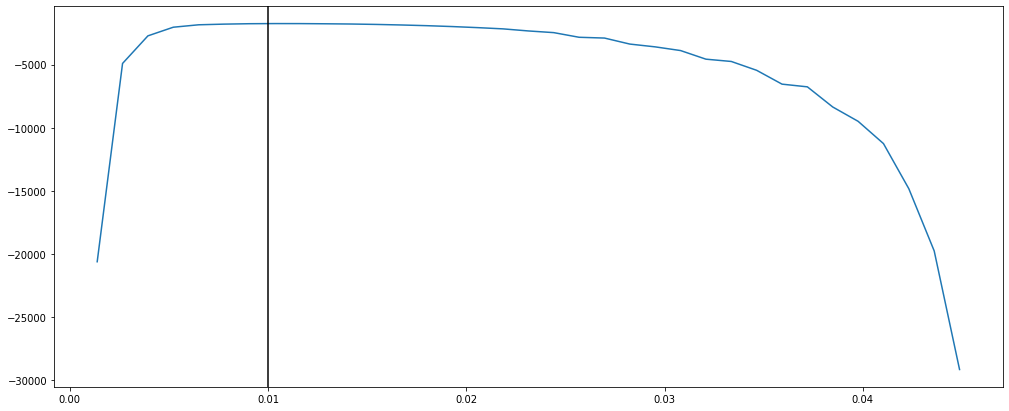

In [8]:
x_0 = np.array([100.])
b1 = 0.010
K1 = 1000
R = 50.

birth = Event(
    rate_calculator=lambda x: max(0, x[0] * b1 * (1 - float(x[0])/K1)),
    change_function=lambda x: [x[0] + 1]
    )

model_real = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[R]]))


possible_b1s = np.linspace(0.0001, 0.05, 40)
possible_Ks = [K1]
possible_Rs = [R]
tests = [(b, k, r) for b in possible_b1s for k in possible_Ks for r in possible_Rs]

time = 500
measurements = [model_real.measure(t) for t in range(time)]



def test_b(tup):
    b, k, r = tup
    test_event = Event(
            rate_calculator=lambda x: max(0, x[0] * b * (1 - float(x[0])/k)),
            change_function=lambda x: [x[0] + 1]
            )
    
    test_model = StochasticModelTauLeaping(x_0, events=[test_event], step_size=1, 
                                   measurement_error_covariance=np.array([[r]]))
    
    pf = ParticleFilter(test_model, N=300, resampling_algo='simple_resample', x_0=test_model.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[r]],
                       prior_cov_matrix=[[50.]], measurements=measurements)
    
    _, _, pf_likelihood =  pf.run(time)
    
    return pf_likelihood

with Pool(10) as p:
    res = p.map(test_b, tests)

res = np.array(res)

plt.plot(possible_b1s, res)
plt.axvline(x=b1, color='k')

In [ ]:
x_0 = np.array([100.])
b1 = 0.010
K1 = 1000
R = 50.

birth = Event(
    rate_calculator=lambda x: max(0, x[0] * b1 * (1 - float(x[0])/K1)),
    change_function=lambda x: [x[0] + 1]
    )

model_real = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[R]]))


possible_b1s = [b1]#np.linspace(0.0001, 0.05, 40)
possible_Ks = np.linspace(10, 30000, 40)
possible_Rs = [R]
tests = [(b, k, r) for b in possible_b1s for k in possible_Ks for r in possible_Rs]

time = 500
measurements = [model_real.measure(t) for t in range(time)]


def test_b(tup):
    b, k, r = tup
    test_event = Event(
            rate_calculator=lambda x: max(0, x[0] * b * (1 - float(x[0])/k)),
            change_function=lambda x: [x[0] + 1]
            )
    
    test_model = StochasticModelTauLeaping(x_0, events=[test_event], step_size=1, 
                                   measurement_error_covariance=np.array([[r]]))
    
    pf = ParticleFilter(test_model, N=300, resampling_algo='simple_resample', x_0=test_model.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[r]],
                       prior_cov_matrix=[[50.]], measurements=measurements)
    
    _, _, pf_likelihood =  pf.run(time)
    
    return pf_likelihood

with Pool(10) as p:
    res = p.map(test_b, tests)

res = np.array(res)

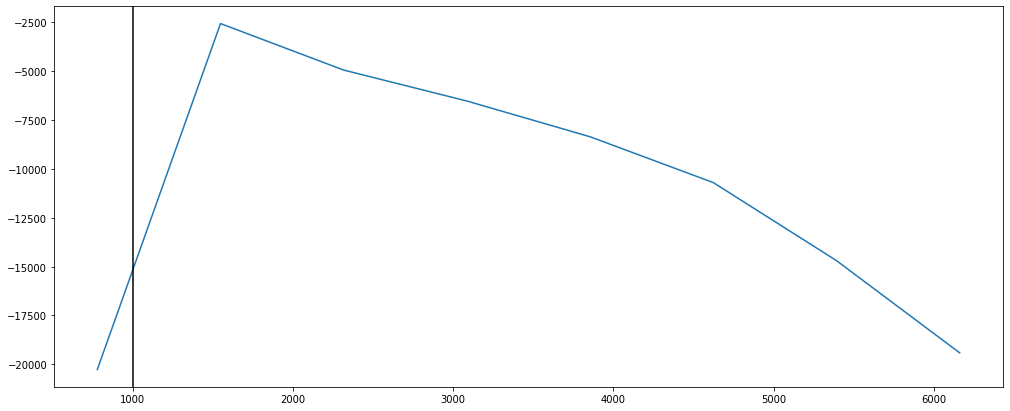

In [34]:
plt.plot(possible_Ks, res)
plt.axvline(x=K1, color='k')

In [36]:
list(zip(possible_Ks, res))

[(10.0, -inf),
 (778.974358974359, -20267.742185126448),
 (1547.948717948718, -2559.5094837270344),
 (2316.923076923077, -4939.48031544573),
 (3085.897435897436, -6524.093171403698),
 (3854.871794871795, -8353.56347540224),
 (4623.846153846154, -10699.320462971624),
 (5392.820512820513, -14693.246132020067),
 (6161.794871794872, -19414.926568405946),
 (6930.769230769231, -inf),
 (7699.74358974359, -inf),
 (8468.71794871795, -inf),
 (9237.692307692309, -inf),
 (10006.666666666668, -inf),
 (10775.641025641025, -inf),
 (11544.615384615385, -inf),
 (12313.589743589744, -inf),
 (13082.564102564103, -inf),
 (13851.538461538463, -inf),
 (14620.51282051282, -inf),
 (15389.48717948718, -inf),
 (16158.461538461539, -inf),
 (16927.4358974359, -inf),
 (17696.410256410258, -inf),
 (18465.384615384617, -inf),
 (19234.358974358976, -inf),
 (20003.333333333336, -inf),
 (20772.30769230769, -inf),
 (21541.28205128205, -inf),
 (22310.25641025641, -inf),
 (23079.23076923077, -inf),
 (23848.20512820513, -i

/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.log(Pyk)
/Users/ioan/SMC/PFClasses.py:194: RuntimeWarning: divide by zero encountered in log
  likelihood += np.l

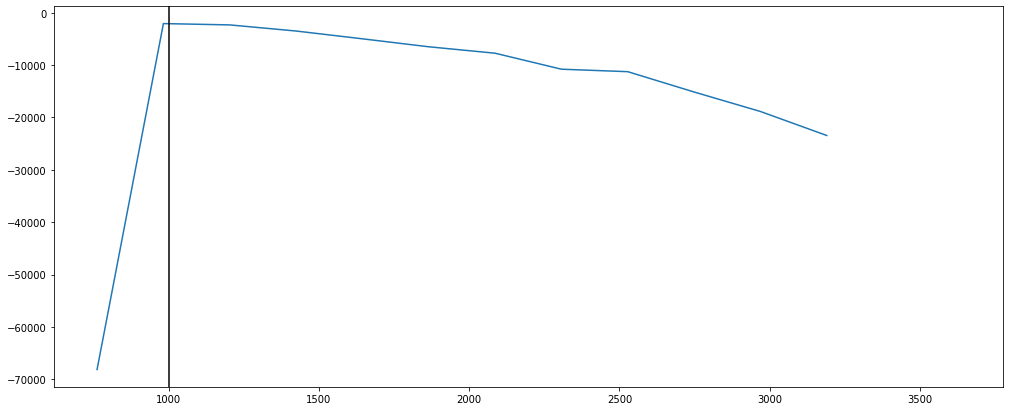

In [16]:
x_0 = np.array([100.])
b1 = 0.010
K1 = 1000
R = 50.

birth = Event(
    rate_calculator=lambda x: max(0, x[0] * b1 * (1 - float(x[0])/K1)),
    change_function=lambda x: [x[0] + 1]
    )

model_real = StochasticModelTauLeaping(x_0, events=[birth], step_size=1, 
                                   measurement_error_covariance=np.array([[R]]))


possible_b1s = [b1] #np.linspace(0.0001, 0.05, 40)
possible_Ks = np.linspace(100, 6500, 30)
possible_Rs = [R]
tests = [(b, k, r) for b in possible_b1s for k in possible_Ks for r in possible_Rs]

time = 600
measurements = [model_real.measure(t) for t in range(time)]


def test_b(tup):
    b, k, r = tup
    test_event = Event(
            rate_calculator=lambda x: max(0, x[0] * b * (1 - float(x[0])/k)),
            change_function=lambda x: [x[0] + 1]
            )
    
    test_model = StochasticModelTauLeaping(x_0, events=[test_event], step_size=1, 
                                   measurement_error_covariance=np.array([[r]]))
    
    pf = ParticleFilter(test_model, N=300, resampling_algo='simple_resample', x_0=test_model.states[0], 
                        print_results=False, measurement_err_cov_matrix=[[r]],
                       prior_cov_matrix=[[50.]], measurements=measurements)
    
    _, _, pf_likelihood =  pf.run(time)
    
    return pf_likelihood

with Pool(10) as p:
    res = p.map(test_b, tests)

res = np.array(res)

plt.plot(possible_Ks, res)
plt.axvline(x=K1, color='k')